In [2]:
import pandas as pd
from rctgan import Metadata
from rctgan.relational import RCTGAN
import pickle

In [3]:
# Load your datasets
df_customers_info = pd.read_csv('../Datasets/Finance/customers_info.csv')
df_transactions = pd.read_csv('../Datasets/Finance/transactions.csv')
df_credit_cards = pd.read_csv('../Datasets/Finance/credit_cards.csv')
df_customer_demographics = pd.read_csv('../Datasets/Finance/customer_demographics.csv')

In [4]:
df_customers_info

,customer_id,first_name,last_name,email,phone_number,address,date_of_birth,account_open_date,account_status
0,1,Arthur,Sloan,desiree67@vargas-nelson.com,678.605.7437,"Unit 7298 Box 9041, DPO AA 88125",1985-11-07,2017-01-04,Active
1,2,Christopher,Schultz,amanda90@hotmail.com,066-950-6331x388,"357 Amy Mountains, West Ashleyfort, NJ 28182",1983-10-01,2015-10-23,Closed
2,3,Jared,Robinson,millercatherine@hotmail.com,818-070-3092,"42776 Daniel Stream, Brownberg, MA 53174",1976-06-07,2023-01-05,Inactive
3,4,Kim,Peterson,gdavis@yahoo.com,289.981.4977x7959,"1542 Fowler Lodge, Franciscofort, OR 73055",1974-09-18,2024-08-24,Active
4,5,Sherry,Sullivan,kjackson@palmer-david.biz,5247897561,"PSC 2148, Box 7515, APO AP 42879",2004-12-11,2020-03-19,Active
...,...,...,...,...,...,...,...,...,...
95,96,Joshua,Nelson,jackpotter@woods.com,298.193.8792x265,"4871 Cuevas Square Suite 882, North Kimfurt, M...",1989-01-28,2023-03-17,Active
96,97,Emily,Jones,randy48@hotmail.com,244-842-4200,"508 Travis Lights Apt. 119, North Phillipbury,...",1960-01-24,2021-07-07,Active
97,98,Timothy,Mckenzie,piercedavid@gmail.com,081-888-7270x81579,"638 Sara Ridges Apt. 844, West Markshire, IL 6...",2003-02-02,2019-06-01,Active
98,99,Susan,Martin,darlene25@gmail.com,363-895-7333x77314,"597 Renee Valleys, New Brookefurt, AZ 93732",1995-12-27,2019-04-26,Active


In [5]:
df_transactions

,transaction_id,customer_id,card_id,transaction_date,amount,merchant,transaction_type
0,1,84,96,2023-09-20,2997.15,Fuller-Fowler,ATM Withdrawal
1,2,89,67,2023-03-19,4134.86,Trujillo-Owens,Bill Payment
2,3,86,27,2024-04-21,4795.58,"Blackwell, Townsend and Tran",ATM Withdrawal
3,4,13,93,2024-03-04,1715.91,Bush-Hopkins,In-Store
4,5,59,32,2022-12-30,1140.62,"Brady, Sullivan and Berry",Bill Payment
...,...,...,...,...,...,...,...
295,296,4,95,2022-12-05,626.57,"Mccormick, Collins and Ware",Bill Payment
296,297,4,36,2023-07-17,4782.30,Thompson-Mcneil,In-Store
297,298,56,36,2024-04-25,3990.96,"Choi, Knox and Graves",ATM Withdrawal
298,299,25,26,2024-01-07,1298.62,Roman-Webb,In-Store


In [6]:
df_credit_cards

,card_id,customer_id,card_number,card_type,credit_limit,expiration_date,cvv,card_status
0,1,63,377583173047655,Amex,14446,2028-12-24,989,Active
1,2,96,3564471652214318,Discover,2218,2025-03-07,541,Active
2,3,52,3543229066971089,Discover,5735,2029-12-22,183,Active
3,4,96,30053698206409,Amex,12296,2028-10-26,640,Expired
4,5,4,340550110331298,Discover,5555,2026-10-29,623,Active
...,...,...,...,...,...,...,...,...
95,96,73,4050387935826281,Visa,4051,2028-08-29,245,Active
96,97,59,4938077676980342,Discover,16979,2026-07-15,588,Active
97,98,70,6011426249903155,Discover,17388,2027-03-02,716,Active
98,99,80,60439511936,Discover,1876,2026-06-21,956,Active


In [7]:
df_customer_demographics

,customer_id,gender,marital_status,income_range,education_level,employment_status,home_ownership
0,1,Male,Single,25K-50K,High School,Employed,Own
1,2,Female,Widowed,100K+,PhD,Unemployed,Mortgage
2,3,Female,Widowed,<25K,High School,Employed,Own
3,4,Female,Single,50K-100K,Master,Retired,Mortgage
4,5,Male,Divorced,50K-100K,Associate,Employed,Mortgage
...,...,...,...,...,...,...,...
95,96,Male,Married,100K+,Associate,Employed,Mortgage
96,97,Male,Single,25K-50K,High School,Employed,Own
97,98,Male,Divorced,100K+,PhD,Employed,Rent
98,99,Male,Single,25K-50K,Associate,Employed,Own


## Removing Date col

In [8]:
df_customers_info.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'phone_number',
       'address', 'date_of_birth', 'account_open_date', 'account_status'],
      dtype='object')

In [9]:
df_customers_info = df_customers_info[['customer_id', 'first_name', 'last_name', 'email', 'phone_number',
       'address', 'account_status']]

In [10]:
df_transactions.columns

Index(['transaction_id', 'customer_id', 'card_id', 'transaction_date',
       'amount', 'merchant', 'transaction_type'],
      dtype='object')

In [11]:
df_transactions = df_transactions[['transaction_id', 'customer_id', 'card_id',
       'amount', 'merchant', 'transaction_type']]

In [12]:
df_credit_cards.columns

Index(['card_id', 'customer_id', 'card_number', 'card_type', 'credit_limit',
       'expiration_date', 'cvv', 'card_status'],
      dtype='object')

In [13]:
df_credit_cards = df_credit_cards[['card_id', 'customer_id', 'card_number', 'card_type', 'credit_limit',
       'cvv', 'card_status']]

In [14]:
df_customer_demographics.columns

Index(['customer_id', 'gender', 'marital_status', 'income_range',
       'education_level', 'employment_status', 'home_ownership'],
      dtype='object')

In [15]:
df_customer_demographics = df_customer_demographics[['customer_id', 'gender', 'marital_status', 'income_range',
       'education_level', 'employment_status', 'home_ownership']]

## Creating the tables dict

In [16]:
# Dictionary to hold dataframes
tables = {
    "customers_info": df_customers_info,
    "transactions": df_transactions,
    "credit_cards": df_credit_cards,
    "customer_demographics": df_customer_demographics
}

## Creating metadata

In [17]:
# Initialize Metadata instance
metadata = Metadata()

# Define field properties for each table
customers_info_fields = {
    "customer_id": {"type": "id", "subtype": "integer"},
    "first_name": {"type": "categorical"},
    "last_name": {"type": "categorical"},
    "email": {"type": "categorical"},
    "phone_number": {"type": "categorical"},
    "address": {"type": "categorical"},  # FIXED: Changed from string to categorical
    # "date_of_birth": {"type": "datetime"},
    # "account_open_date": {"type": "datetime"},
    "account_status": {"type": "categorical"}
}

credit_cards_fields = {
    "card_id": {"type": "id", "subtype": "integer"},
    "customer_id": {"type": "id", "subtype": "integer"},
    "card_number": {"type": "numerical", "subtype": "integer"},  # FIXED: Added subtype
    "card_type": {"type": "categorical"},
    "credit_limit": {"type": "numerical", "subtype": "float"},
    # "expiration_date": {"type": "datetime"},
    "cvv": {"type": "numerical", "subtype": "integer"},  # FIXED: Added subtype
    "card_status": {"type": "categorical"}
}

transactions_fields = {
    "transaction_id": {"type": "id", "subtype": "integer"},
    "customer_id": {"type": "id", "subtype": "integer"},
    "card_id": {"type": "id", "subtype": "integer"},
    # "transaction_date": {"type": "datetime"},
    "amount": {"type": "numerical", "subtype": "float"},
    "merchant": {"type": "categorical"},
    "transaction_type": {"type": "categorical"}
}

customer_demographics_fields = {
    "customer_id": {"type": "id", "subtype": "integer"},
    "gender": {"type": "categorical"},
    "marital_status": {"type": "categorical"},
    "income_range": {"type": "categorical"},
    "education_level": {"type": "categorical"},
    "employment_status": {"type": "categorical"},
    "home_ownership": {"type": "categorical"}
}

# Add tables with primary keys
metadata.add_table(
    name="customers_info",
    data=tables["customers_info"],
    primary_key="customer_id",
    fields_metadata=customers_info_fields
)

metadata.add_table(
    name="transactions",
    data=tables["transactions"],
    primary_key="transaction_id",
    fields_metadata=transactions_fields
)

metadata.add_table(
    name="credit_cards",
    data=tables["credit_cards"],
    primary_key="card_id",
    fields_metadata=credit_cards_fields
)

metadata.add_table(
    name="customer_demographics",
    data=tables["customer_demographics"],
    primary_key="customer_id",
    fields_metadata=customer_demographics_fields
)

# Add relationships (Foreign Key mappings)
metadata.add_relationship(parent="customers_info", child="transactions", foreign_key="customer_id")
metadata.add_relationship(parent="customers_info", child="credit_cards", foreign_key="customer_id")
metadata.add_relationship(parent="customers_info", child="customer_demographics", foreign_key="customer_id")
metadata.add_relationship(parent="credit_cards", child="transactions", foreign_key="card_id")

# Print metadata to verify
import json
print(json.dumps(metadata.to_dict(), indent=4))

{
    "tables": {
        "customers_info": {
            "fields": {
                "customer_id": {
                    "type": "id",
                    "subtype": "integer"
                },
                "first_name": {
                    "type": "categorical"
                },
                "last_name": {
                    "type": "categorical"
                },
                "email": {
                    "type": "categorical"
                },
                "phone_number": {
                    "type": "categorical"
                },
                "address": {
                    "type": "categorical"
                },
                "account_status": {
                    "type": "categorical"
                }
            },
            "primary_key": "customer_id"
        },
        "transactions": {
            "fields": {
                "transaction_id": {
                    "type": "id",
                    "subtype": "integer"
                },
  

# Model Training

## Training the model

In [100]:
model = RCTGAN(metadata)
model.fit(tables)

/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[columns] = columns_data
/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[columns] = columns_data
/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

## Saving the model

In [101]:
pickle.dump(model, open('../Models/model_rctgan.p', "wb" ) )

## Loading the model

In [19]:
model = pickle.load(open("../Models/model_rctgan.p", "rb" ) )

# Model Fine Tuning

## Tuning the model

In [18]:
hyper = {
    'customers_info': {
        'embedding_dim': 64,
        'generator_lr': 2e-5,
        'generator_dim': (256, 256)
    },
    'transactions': {
        'embedding_dim': 12,
        'generator_lr': 2e-4,
        'generator_dim': (128, 128),
        'batch_size': 10000
    },
    'credit_cards': {
        'embedding_dim': 12,
        'generator_lr': 2e-4,
        'generator_dim': (64, 64),
        'batch_size': 10000,
        'grand_parent': True
    },
    'customer_demographics': {
        'embedding_dim': 16,
        'generator_lr': 3e-4,
        'generator_dim': (128, 128),
        'batch_size': 8000
    }
}

# Initialize and train the RCTGAN model
model = RCTGAN(metadata, hyper)
model.fit(tables)

/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[columns] = columns_data
/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[columns] = columns_data
/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

## Saving the Tuned Model

In [19]:
pickle.dump(model, open('../Models/model_rctgan_tuned.p', "wb" ) )

## Loading the Tuned Model

In [20]:
model = pickle.load(open("../Models/model_rctgan_tuned.p", "rb" ) )

# Generating the samples

In [21]:
synthetic_data = model.sample()

/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/ctganpc/synthesizers/ctganpc.py:994: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_gobal = data_gobal.append(data)
/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/ctganpc/synthesizers/ctganpc.py:994: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_gobal = data_gobal.append(data)
/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/ctganpc/synthesizers/ctganpc.py:994: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_gobal = data_gobal.append(data)


In [22]:
synthetic_data.keys()

dict_keys(['customers_info', 'customer_demographics', 'credit_cards', 'transactions'])

In [23]:
for df_key in synthetic_data.keys():
    synthetic_data[df_key] = synthetic_data[df_key][tables[df_key].columns]

In [24]:
df_customers_info

,customer_id,first_name,last_name,email,phone_number,address,account_status
0,1,Arthur,Sloan,desiree67@vargas-nelson.com,678.605.7437,"Unit 7298 Box 9041, DPO AA 88125",Active
1,2,Christopher,Schultz,amanda90@hotmail.com,066-950-6331x388,"357 Amy Mountains, West Ashleyfort, NJ 28182",Closed
2,3,Jared,Robinson,millercatherine@hotmail.com,818-070-3092,"42776 Daniel Stream, Brownberg, MA 53174",Inactive
3,4,Kim,Peterson,gdavis@yahoo.com,289.981.4977x7959,"1542 Fowler Lodge, Franciscofort, OR 73055",Active
4,5,Sherry,Sullivan,kjackson@palmer-david.biz,5247897561,"PSC 2148, Box 7515, APO AP 42879",Active
...,...,...,...,...,...,...,...
95,96,Joshua,Nelson,jackpotter@woods.com,298.193.8792x265,"4871 Cuevas Square Suite 882, North Kimfurt, M...",Active
96,97,Emily,Jones,randy48@hotmail.com,244-842-4200,"508 Travis Lights Apt. 119, North Phillipbury,...",Active
97,98,Timothy,Mckenzie,piercedavid@gmail.com,081-888-7270x81579,"638 Sara Ridges Apt. 844, West Markshire, IL 6...",Active
98,99,Susan,Martin,darlene25@gmail.com,363-895-7333x77314,"597 Renee Valleys, New Brookefurt, AZ 93732",Active


In [25]:
synthetic_data['customers_info']

,customer_id,first_name,last_name,email,phone_number,address,account_status
0,0,Anthony,Callahan,rickyhamilton@spencer-spencer.com,(052)494-1827x13363,"0553 Ortiz Brook Apt. 664, Port Gregoryfurt, V...",Active
1,1,Joshua,Hardin,gmurphy@hotmail.com,831.571.9699,"4648 Jennifer Plaza, Toddton, LA 64989",Inactive
2,2,Andrew,Sullivan,kwilson@yahoo.com,059-341-1002x586,"577 Reid Stravenue, Zavalaview, IA 19920",Inactive
3,3,Monique,Peterson,darren93@taylor.biz,001-699-459-0945x9744,"64431 Williams Terrace Suite 643, Harrisland, ...",Active
4,4,Jennifer,Maldonado,zsmith@smith.org,001-301-240-5954x21539,"916 Robbins Way Suite 740, Lake Garretttown, I...",Active
...,...,...,...,...,...,...,...
95,95,Elizabeth,Green,millerdonna@smith.net,+1-109-451-0177,"322 Carter Drives Suite 730, Josephview, MA 93078",Active
96,96,Christopher,Price,owenslaura@sanchez-owens.com,6202539256,"07973 Kimberly Avenue Apt. 811, Lake Crystalbe...",Active
97,97,Christina,White,amanda90@hotmail.com,377-955-0326,"95797 Daniel Circle, Powellburgh, IN 81732",Active
98,98,Ian,Downs,enguyen@yahoo.com,(336)353-7565x5522,"69734 Heather Curve, South Jeffreybury, NJ 95764",Inactive


In [26]:
df_transactions

,transaction_id,customer_id,card_id,amount,merchant,transaction_type
0,1,84,96,2997.15,Fuller-Fowler,ATM Withdrawal
1,2,89,67,4134.86,Trujillo-Owens,Bill Payment
2,3,86,27,4795.58,"Blackwell, Townsend and Tran",ATM Withdrawal
3,4,13,93,1715.91,Bush-Hopkins,In-Store
4,5,59,32,1140.62,"Brady, Sullivan and Berry",Bill Payment
...,...,...,...,...,...,...
295,296,4,95,626.57,"Mccormick, Collins and Ware",Bill Payment
296,297,4,36,4782.30,Thompson-Mcneil,In-Store
297,298,56,36,3990.96,"Choi, Knox and Graves",ATM Withdrawal
298,299,25,26,1298.62,Roman-Webb,In-Store


In [27]:
transaction_syn = synthetic_data['transactions']
transaction_syn

,transaction_id,customer_id,card_id,amount,merchant,transaction_type
0,1,0,46,4701.66,Allen Inc,Bill Payment
1,2,0,55,2898.98,"Peters, Gibson and Reilly",Online
2,3,1,40,2270.16,Gaines-Watson,ATM Withdrawal
3,4,2,32,2964.59,King Inc,In-Store
4,5,2,65,2479.44,Hunter-Hamilton,Online
...,...,...,...,...,...,...
359,360,98,72,2252.52,"Arnold, Hicks and Gonzalez",ATM Withdrawal
360,361,98,81,495.63,"Cooper, Anderson and Hodge",ATM Withdrawal
361,362,99,78,4273.09,Davis Inc,ATM Withdrawal
362,363,99,94,170.82,"Lopez, Cisneros and Cole",Online


In [28]:
df_credit_cards

,card_id,customer_id,card_number,card_type,credit_limit,cvv,card_status
0,1,63,377583173047655,Amex,14446,989,Active
1,2,96,3564471652214318,Discover,2218,541,Active
2,3,52,3543229066971089,Discover,5735,183,Active
3,4,96,30053698206409,Amex,12296,640,Expired
4,5,4,340550110331298,Discover,5555,623,Active
...,...,...,...,...,...,...,...
95,96,73,4050387935826281,Visa,4051,245,Active
96,97,59,4938077676980342,Discover,16979,588,Active
97,98,70,6011426249903155,Discover,17388,716,Active
98,99,80,60439511936,Discover,1876,956,Active


In [29]:
synthetic_data['credit_cards']

,card_id,customer_id,card_number,card_type,credit_limit,cvv,card_status
0,1,1,60439511936,Discover,4760,826,Active
1,2,1,60439511936,MasterCard,11252,322,Expired
2,3,1,38481140738793576,Amex,8802,864,Active
3,4,1,60439511936,Discover,5685,826,Active
4,5,1,60439511936,MasterCard,5646,454,Blocked
...,...,...,...,...,...,...,...
92,93,95,60439511936,MasterCard,18099,521,Active
93,94,96,60439511936,MasterCard,5571,527,Expired
94,95,99,60439511936,Visa,19711,600,Active
95,96,99,51054651693390208,MasterCard,17197,605,Active


# Evaluating data quality

In [30]:
from table_evaluator import TableEvaluator

IPython not installed.


In [31]:
# Step 5: Define Evaluation Function
def evaluate_synthetic_data(real_data, synthetic_data, metadata, dataset_name="Dataset"):
    print(f"\n--- Evaluating {dataset_name} ---")
    
    # TableEvaluator - Visual Evaluation
    print("\nTableEvaluator Results:")
    evaluator = TableEvaluator(real_data, synthetic_data)
    evaluator.visual_evaluation()
    evaluator.evaluate(target_col=real_data.columns[1])  # Adjust target column

In [32]:
tables.keys()

dict_keys(['customers_info', 'transactions', 'credit_cards', 'customer_demographics'])


--- Evaluating transactions ---

TableEvaluator Results:


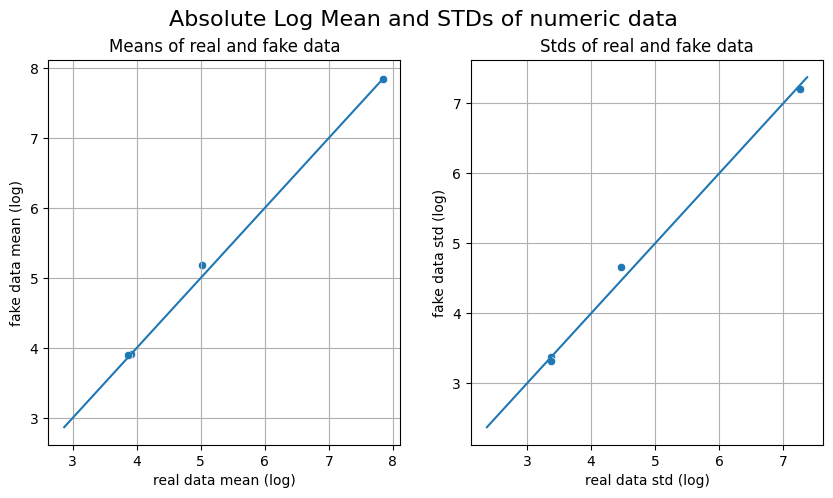

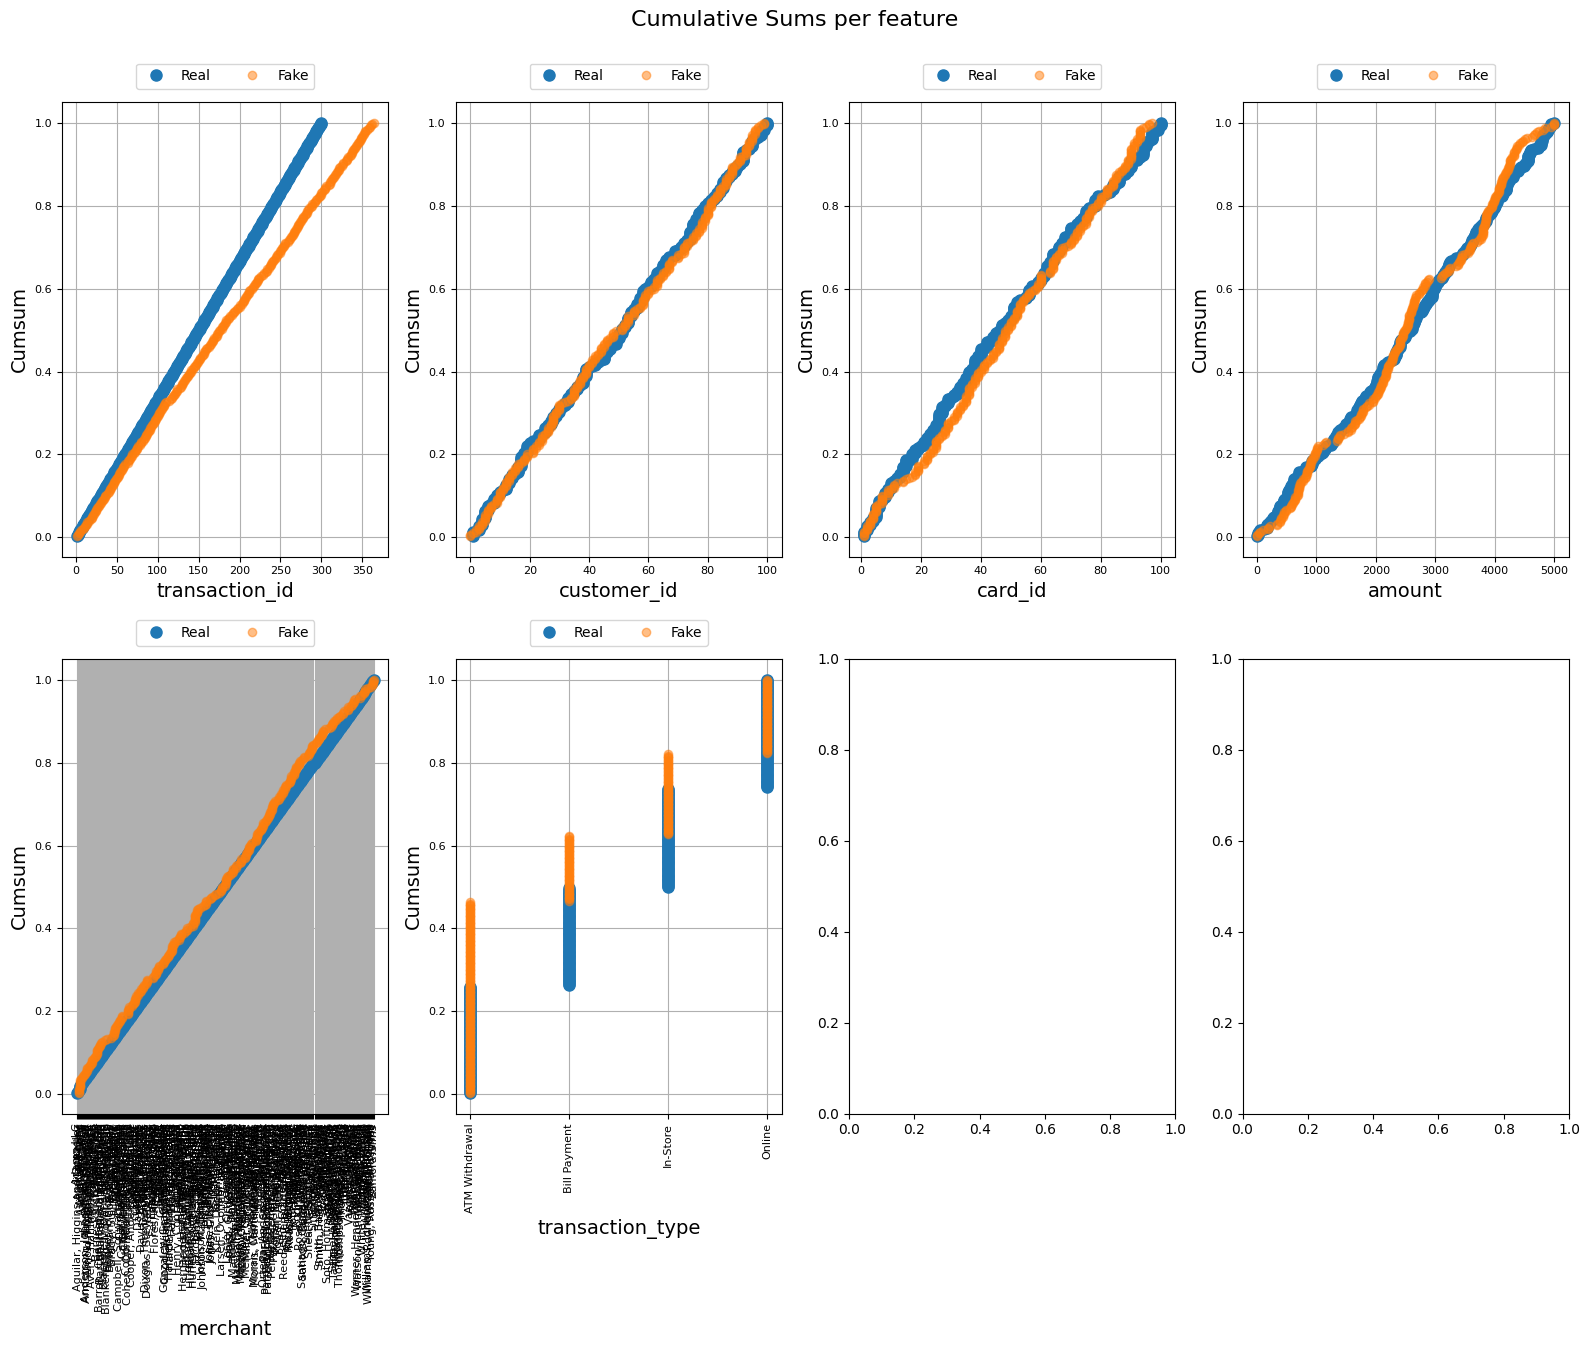

/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


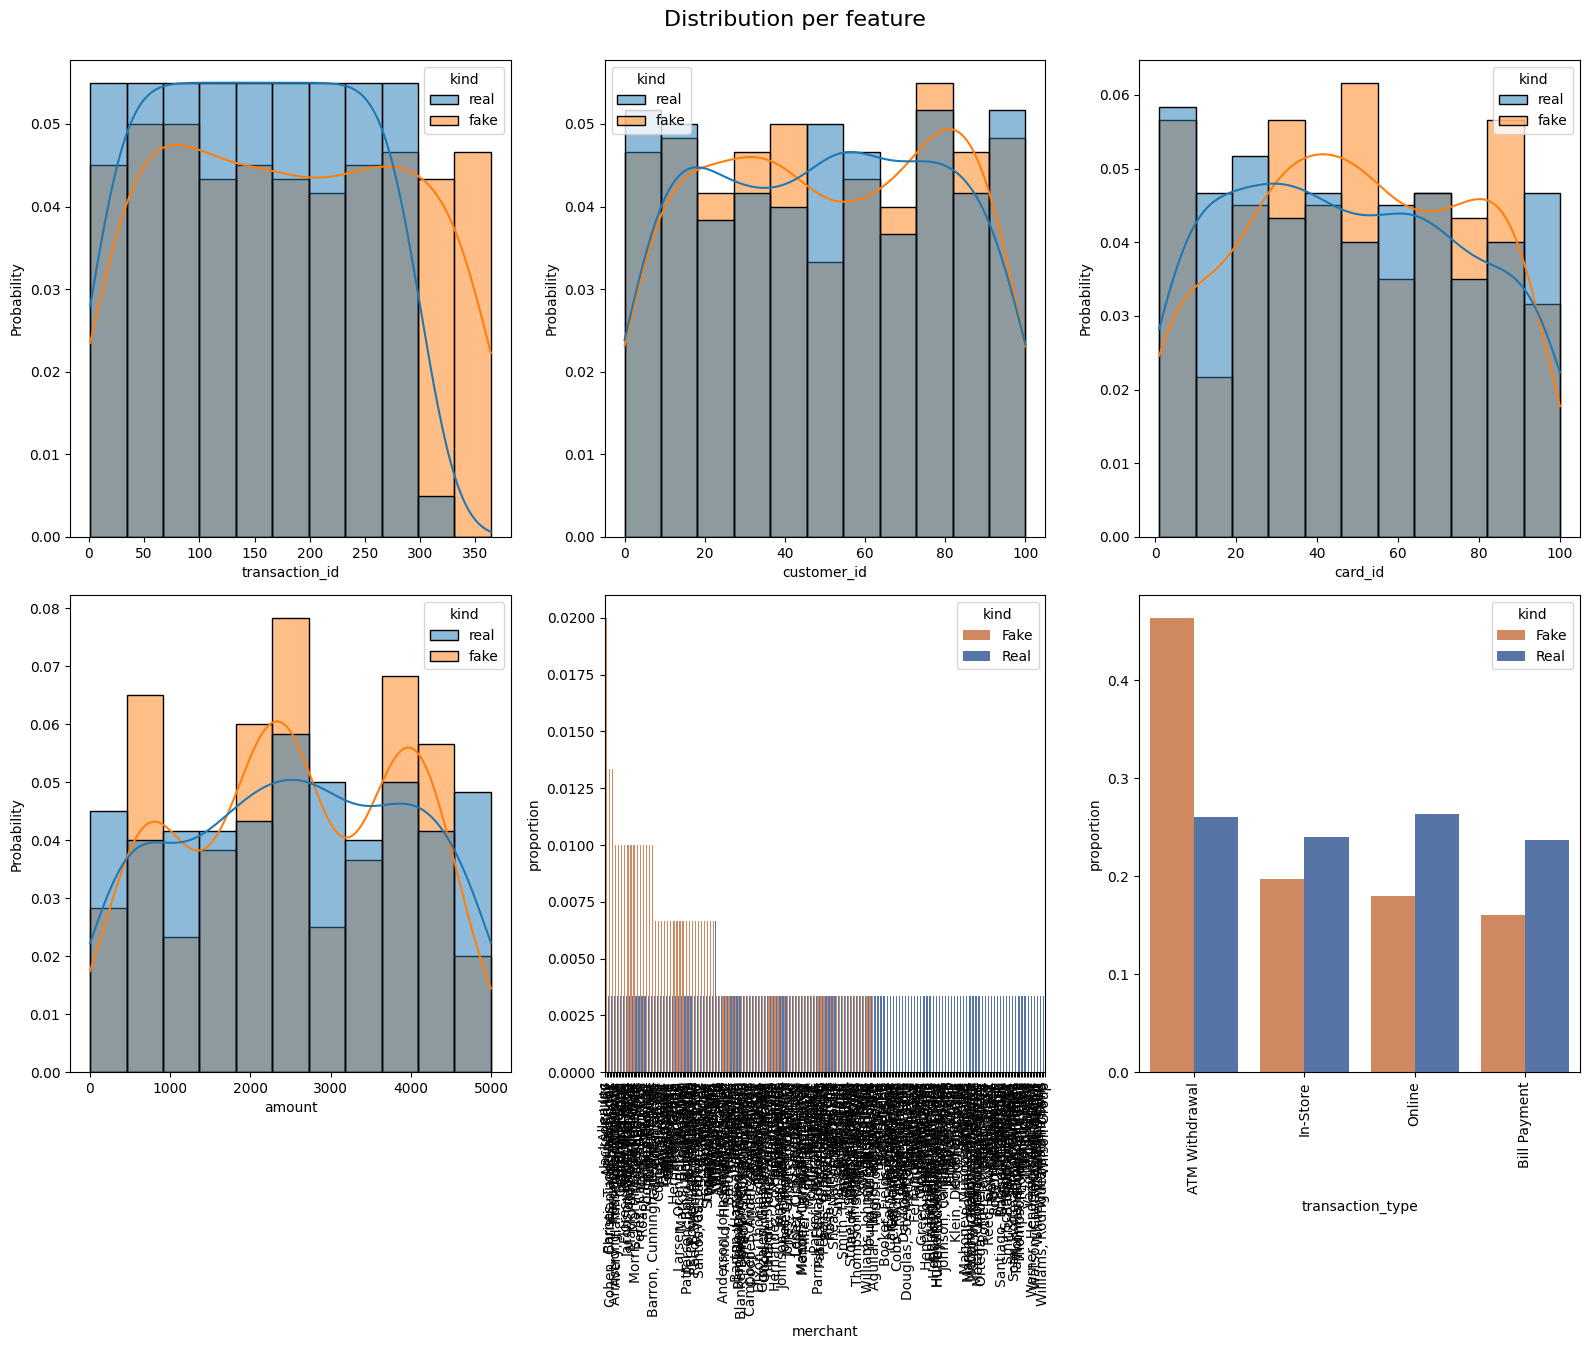

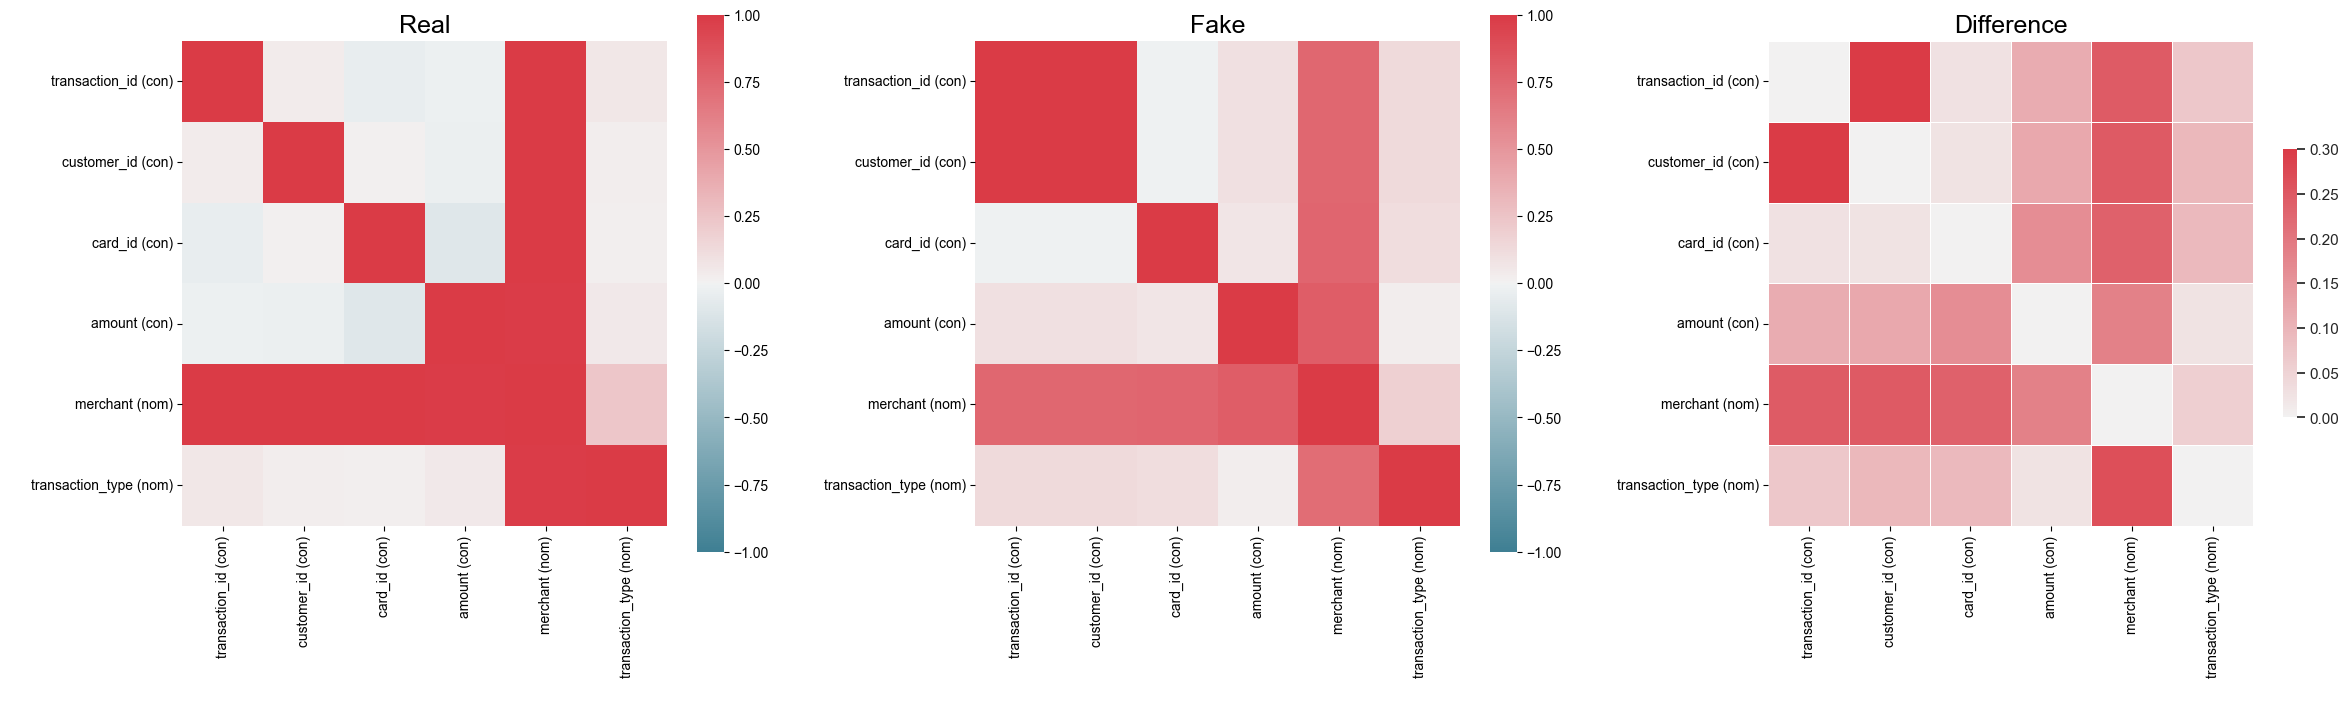

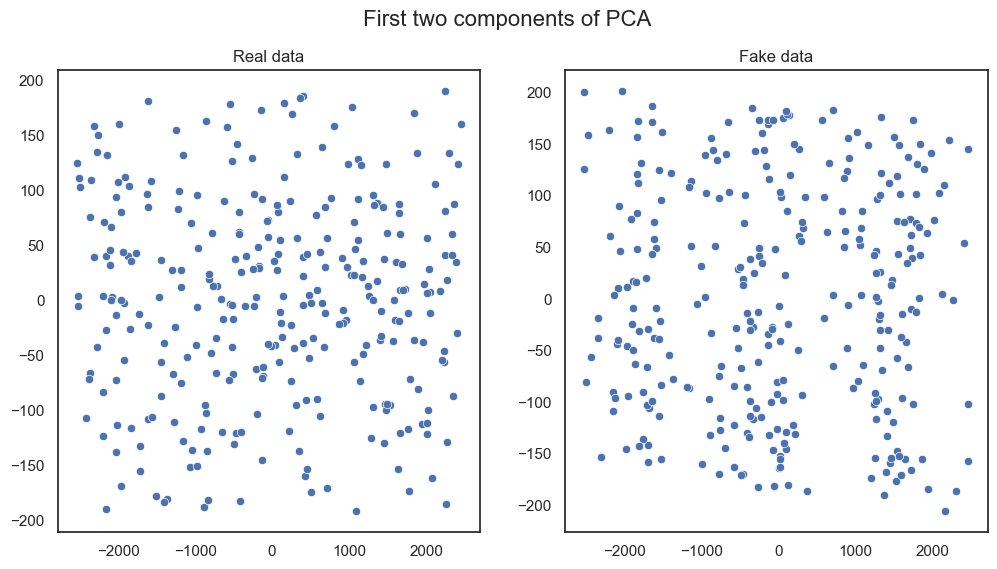

/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/metrics.py:44: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/metrics.py:44: RuntimeWar

IPython not installed.IPython not installed.

IPython not installed.IPython not installed.



/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A 

IPython not installed.
IPython not installed.
IPython not installed.
IPython not installed.

Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0500   0.6167              0.0084
DecisionTreeClassifier_real   0.0167   0.0167              0.0000
LogisticRegression_fake       0.0167   0.0333              0.0000
LogisticRegression_real       0.0000   0.0000              0.0169
MLPClassifier_fake            0.0333   0.0667              0.0619
MLPClassifier_real            0.0000   0.0167              0.0526
RandomForestClassifier_fake   0.0167   0.1500              0.0000
RandomForestClassifier_real   0.0000   0.0167              0.0000

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.7812
nearest neighbor std           

In [33]:
evaluate_synthetic_data(df_transactions, 
                        synthetic_data["transactions"], 
                        metadata, 
                        dataset_name="transactions")


--- Evaluating credit_cards ---

TableEvaluator Results:


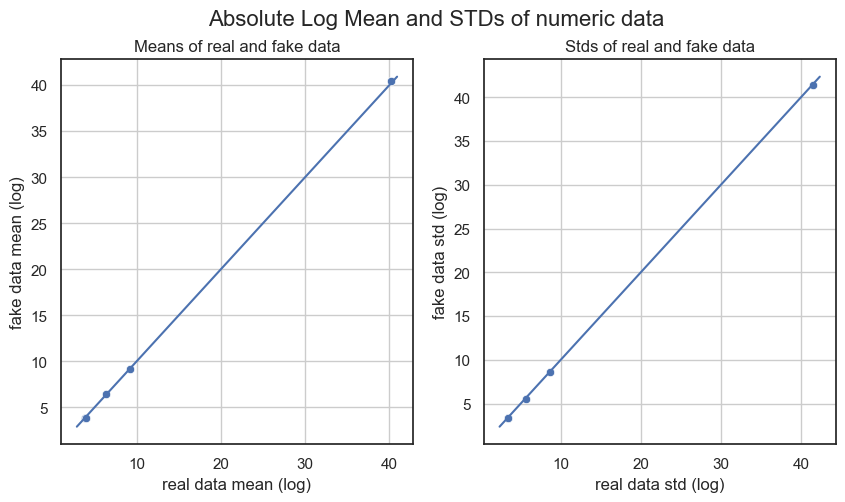

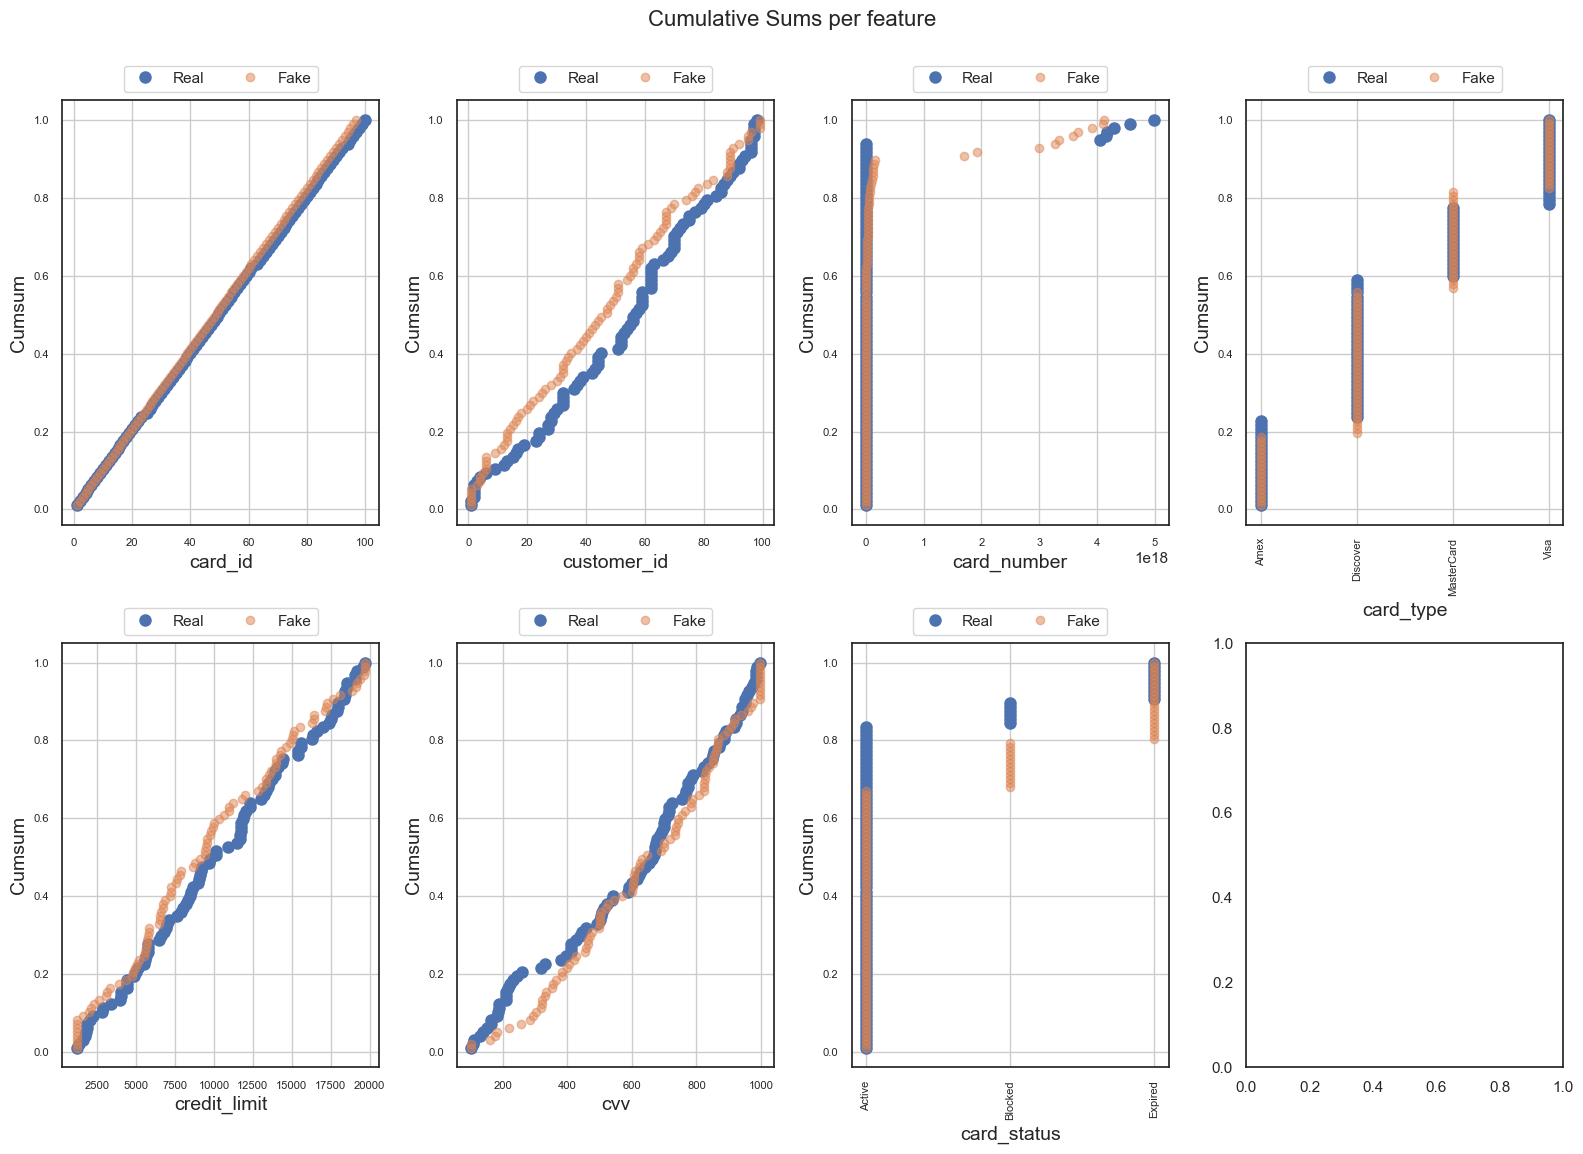

/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


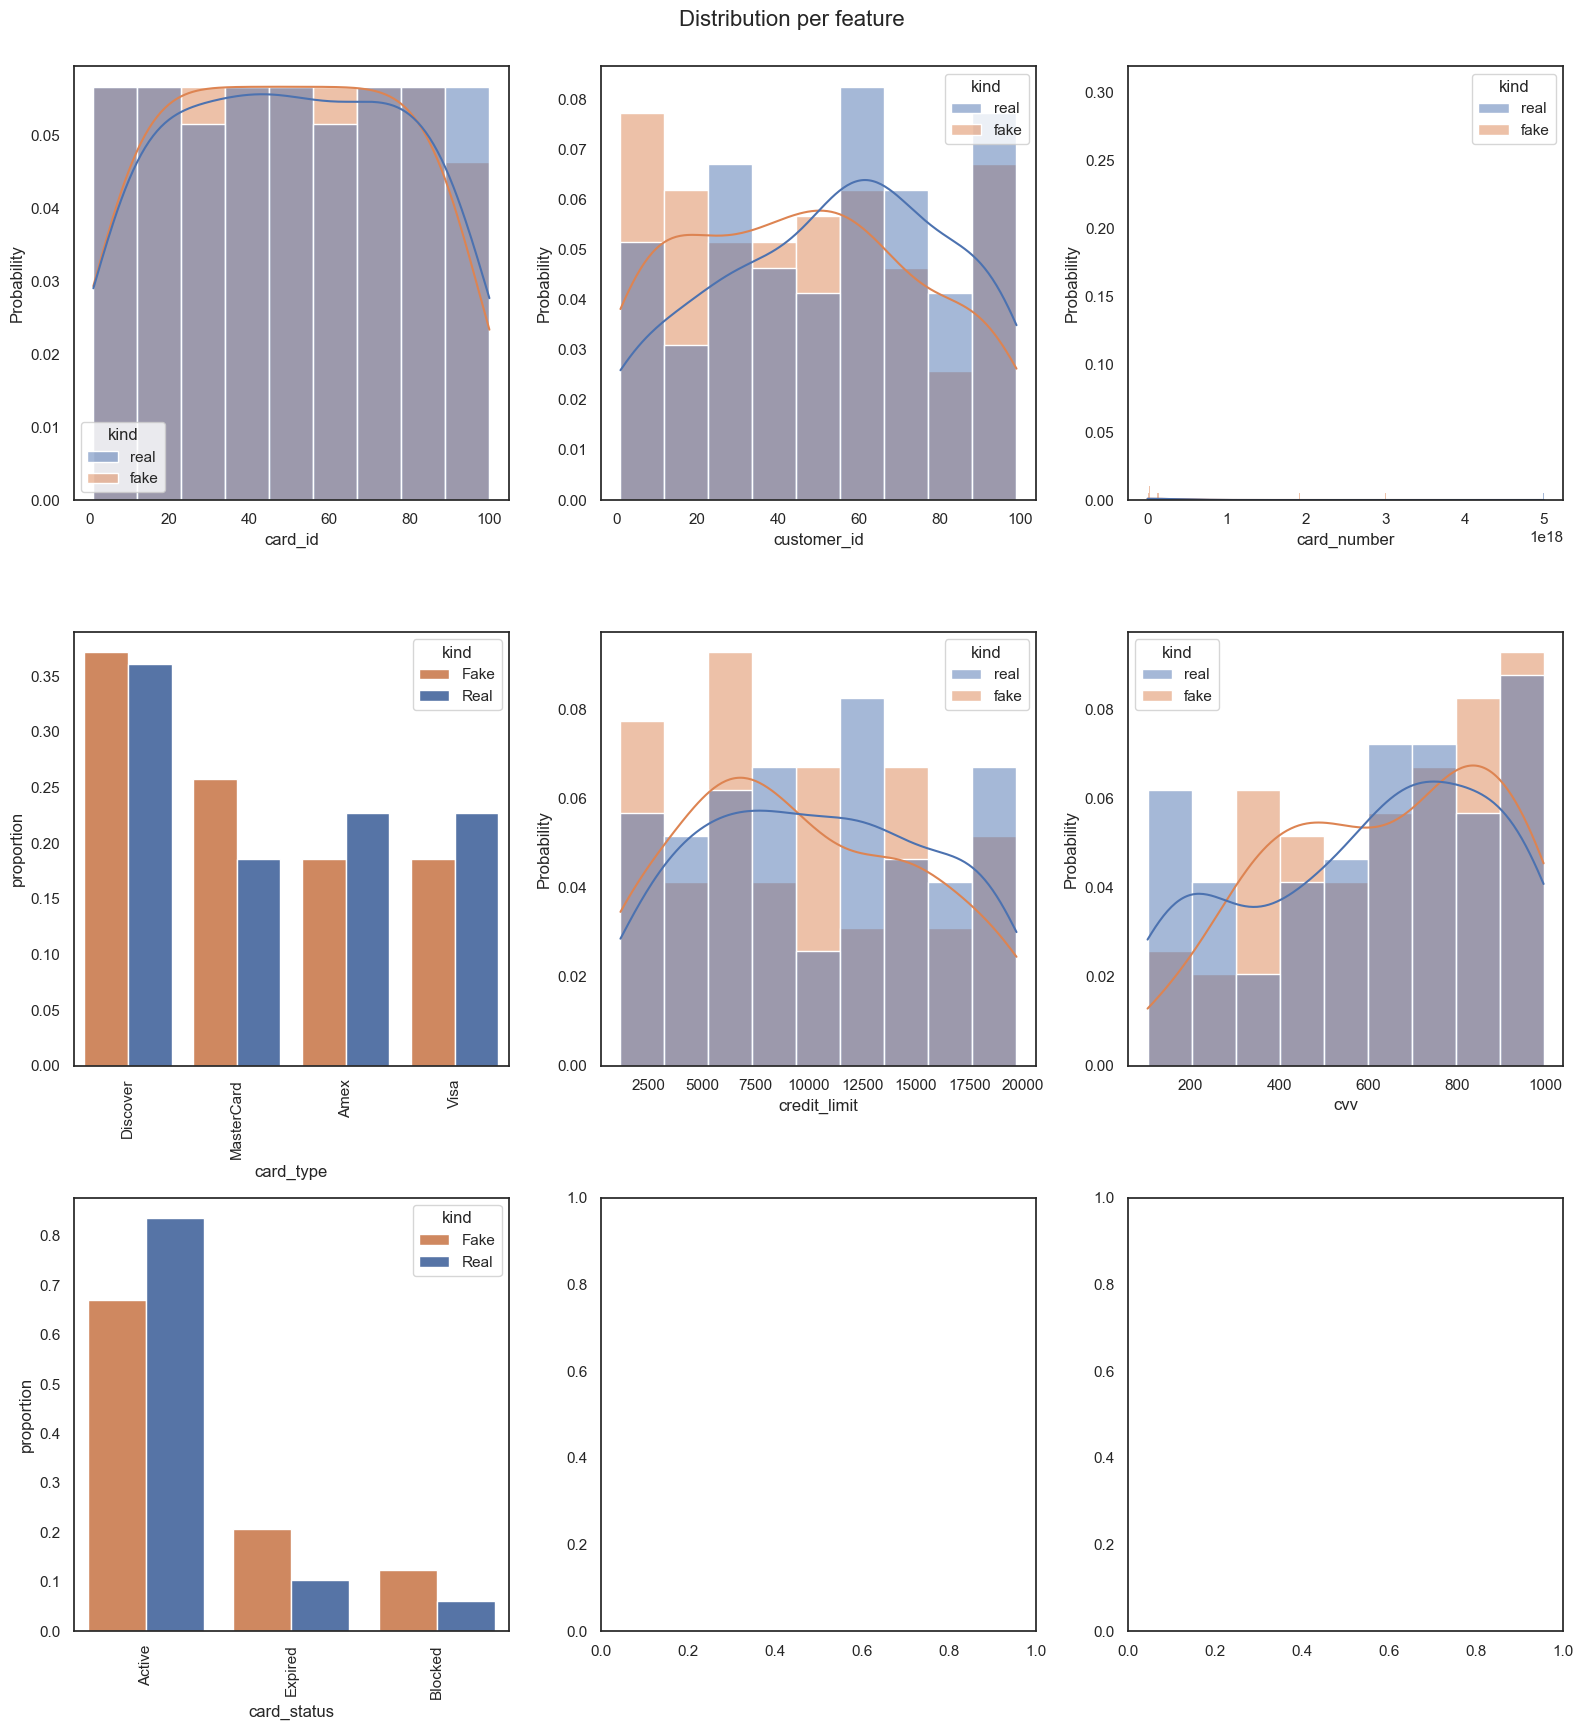

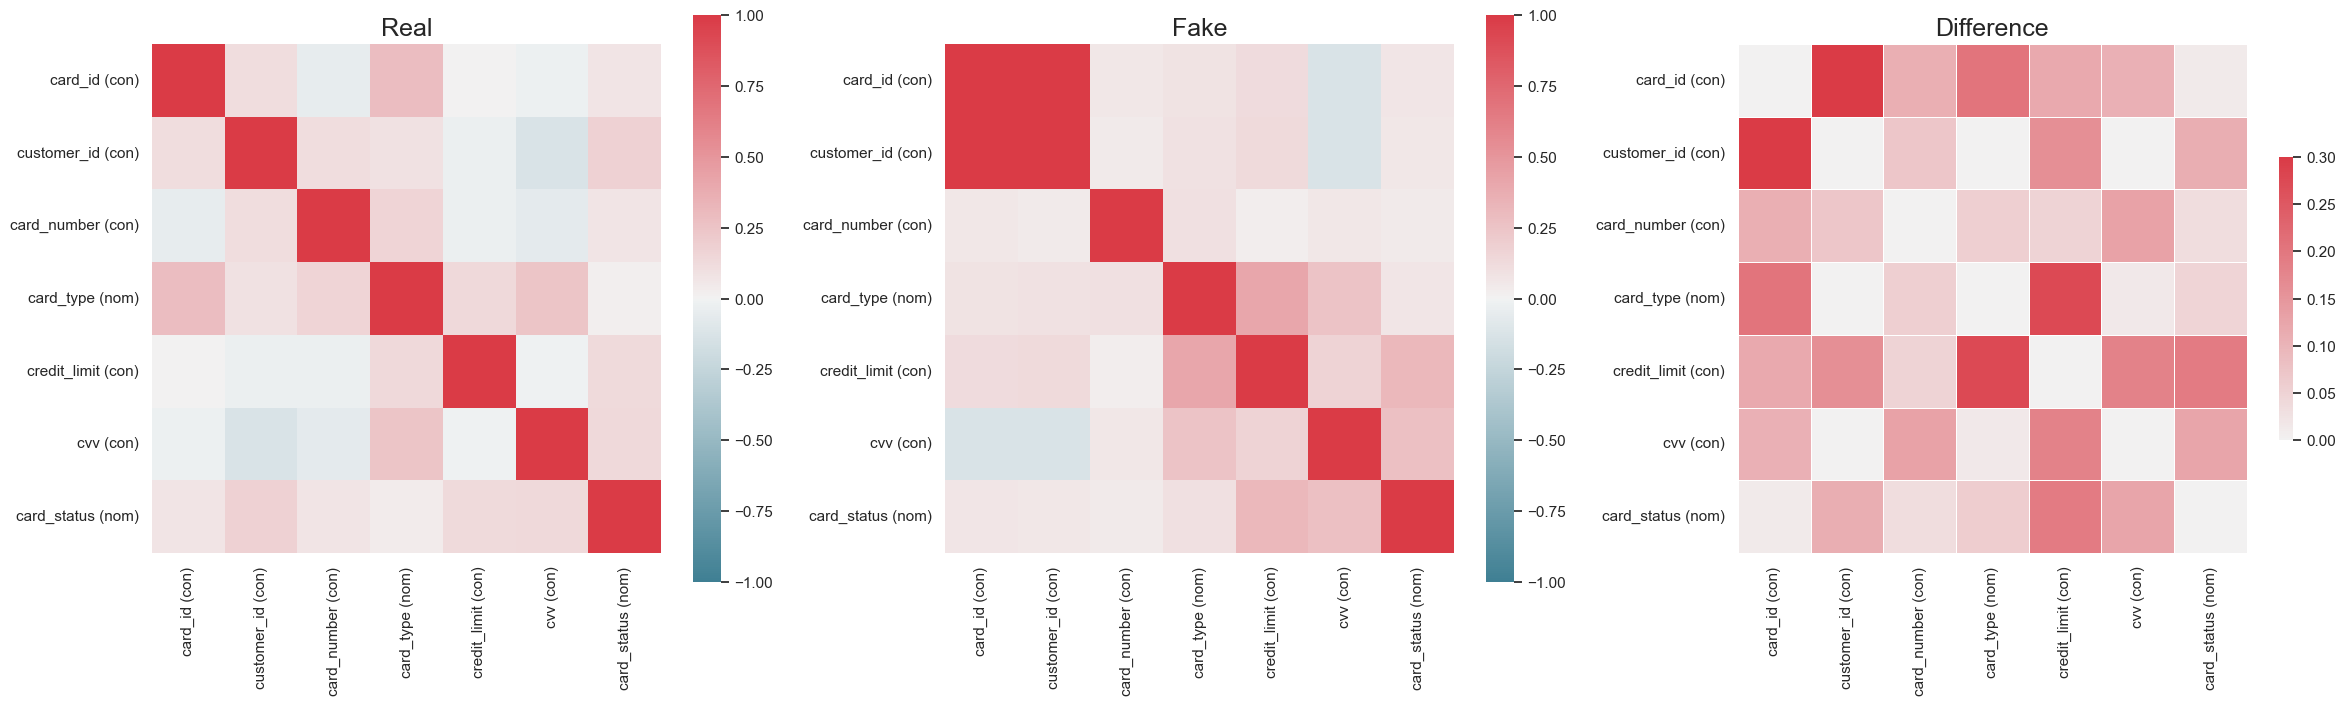

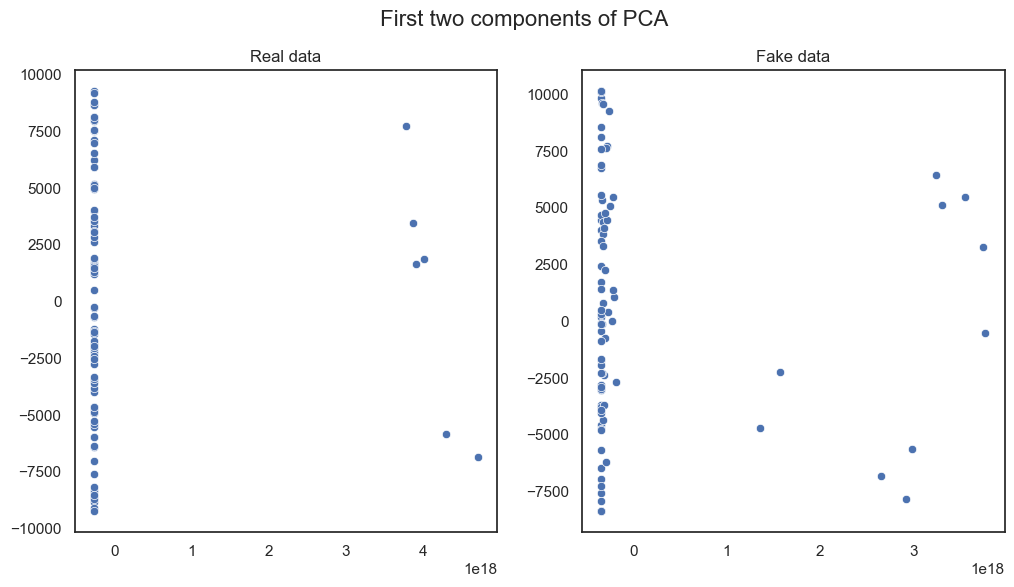

/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0000   0.2500              0.0000
DecisionTreeClassifier_real   0.0000   0.0000              0.0256
LogisticRegression_fake       0.0500   0.0000              0.0000
LogisticRegression_real       0.0000   0.0000              0.0000
MLPClassifier_fake            0.0000   0.0000              0.0000
MLPClassifier_real            0.0000   0.0000              0.0000
RandomForestClassifier_fake   0.0000   0.0500              0.0000
RandomForestClassifier_real   0.0000   0.0500              0.0000

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.3863
nearest neighbor std                     0.5459

Miscellaneous results:
                                  Result
Column Cor

/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/metrics.py:44: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/metrics.py:44: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))


In [34]:
evaluate_synthetic_data(df_credit_cards, 
                        synthetic_data["credit_cards"], 
                        metadata, 
                        dataset_name="credit_cards")


--- Evaluating customer_demographics ---

TableEvaluator Results:


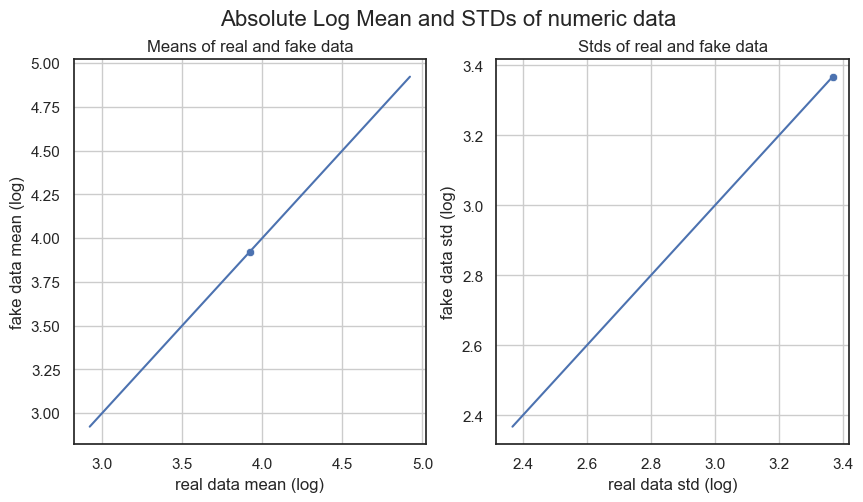

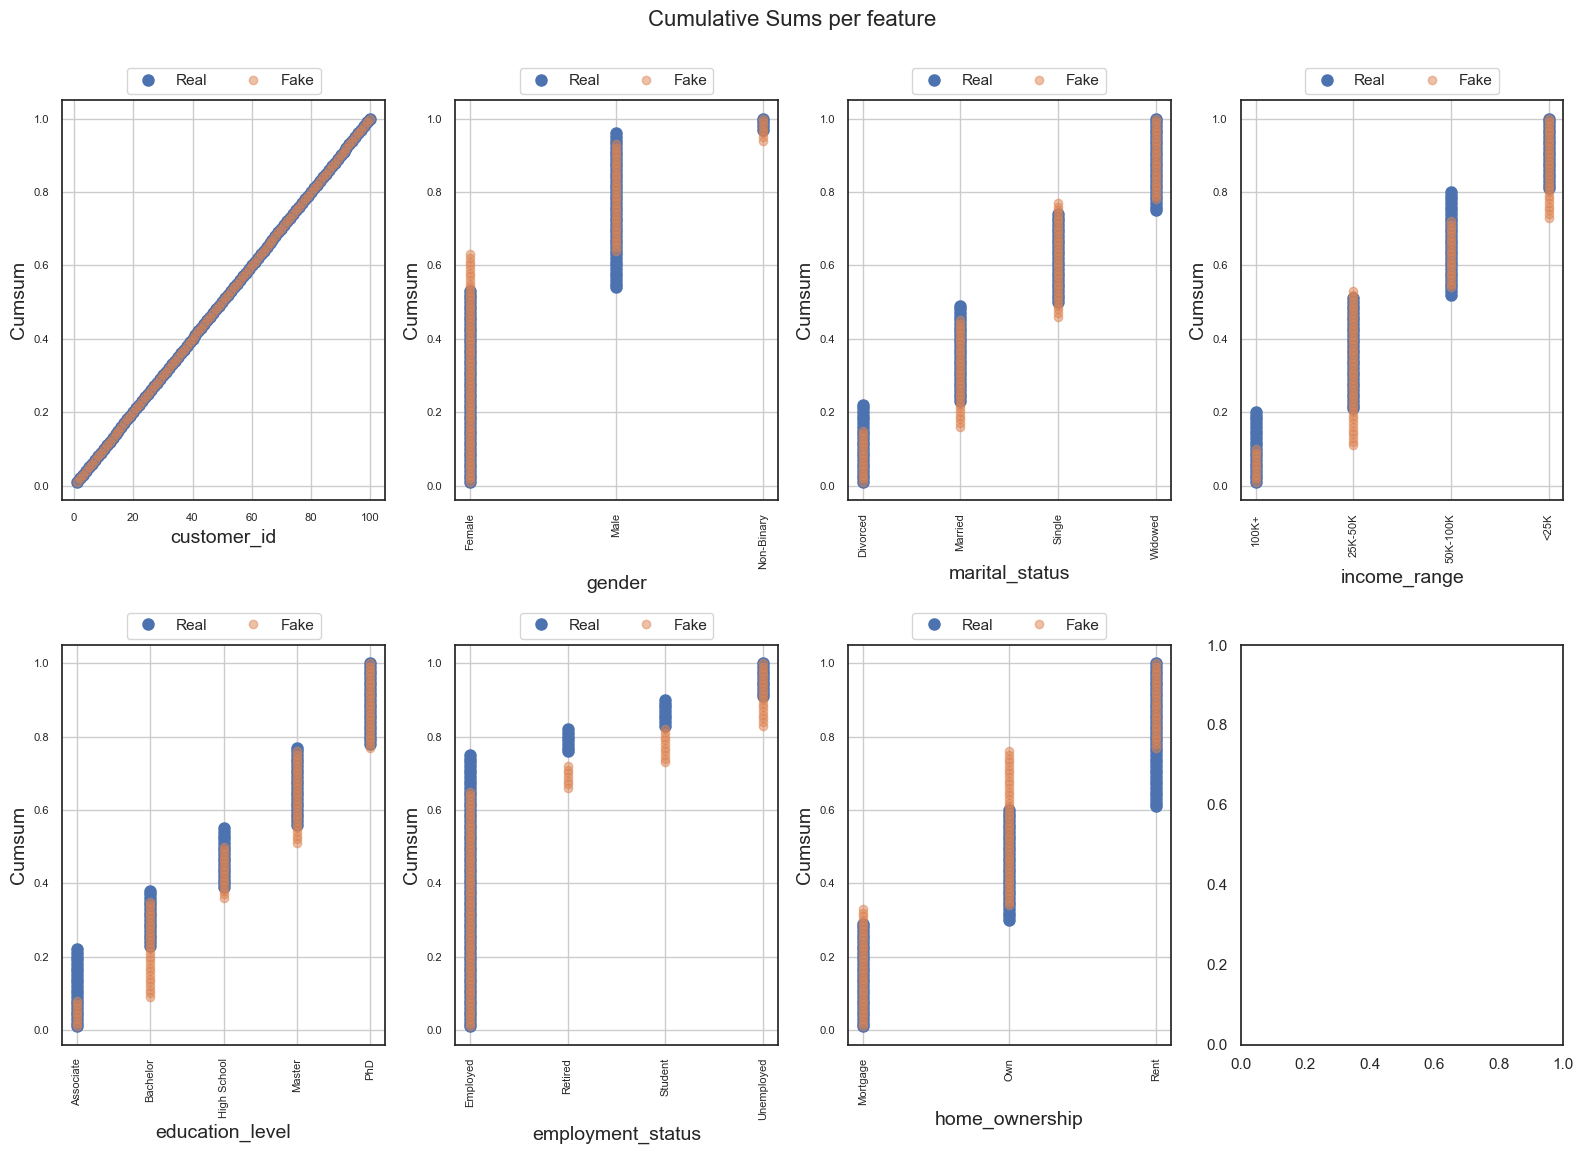

/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEn

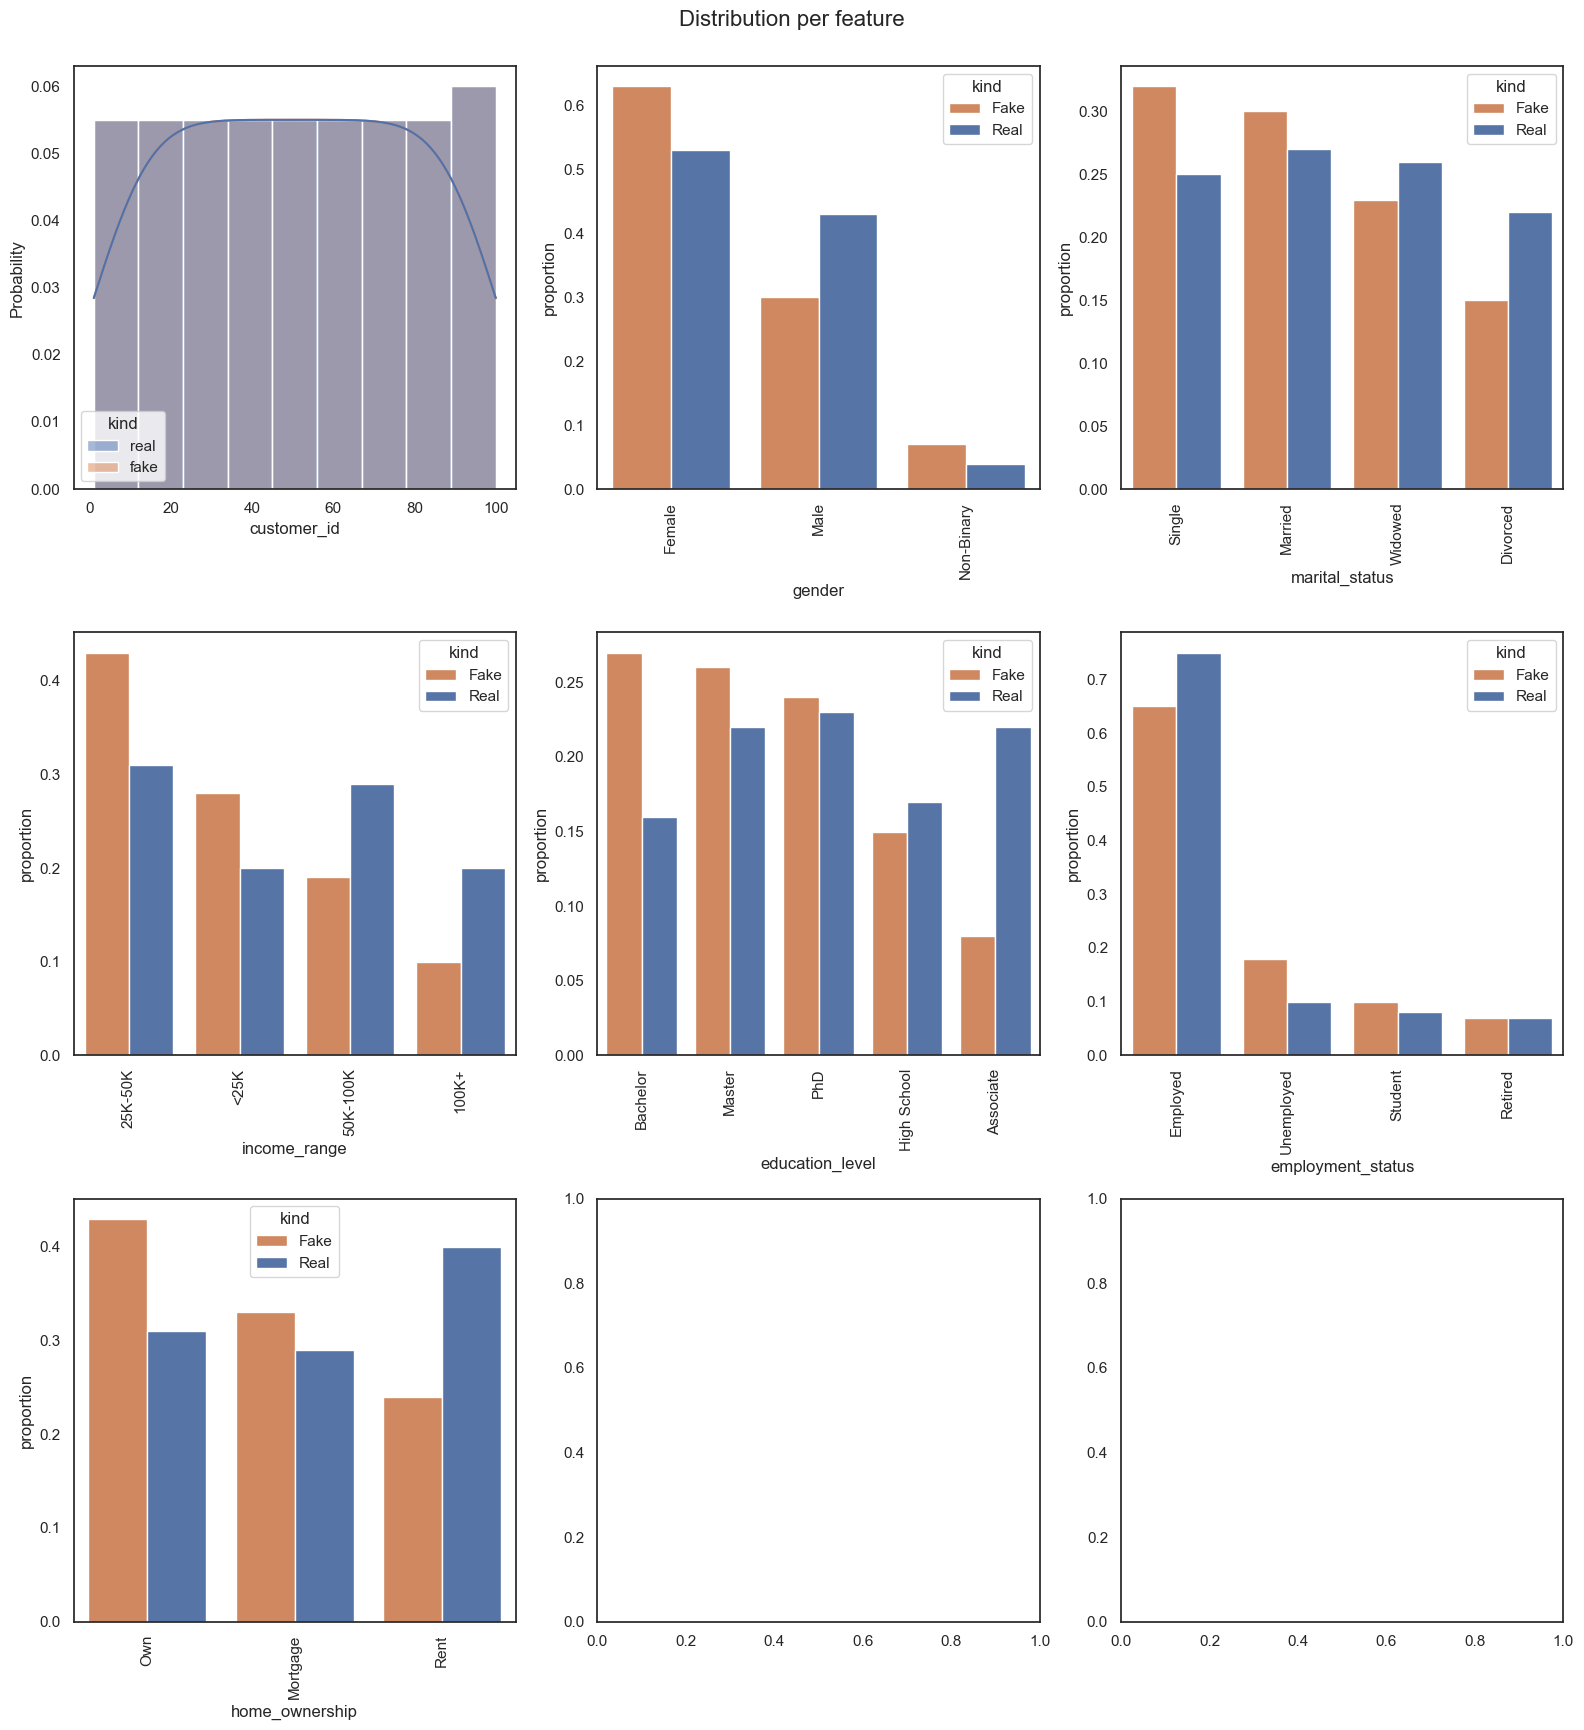

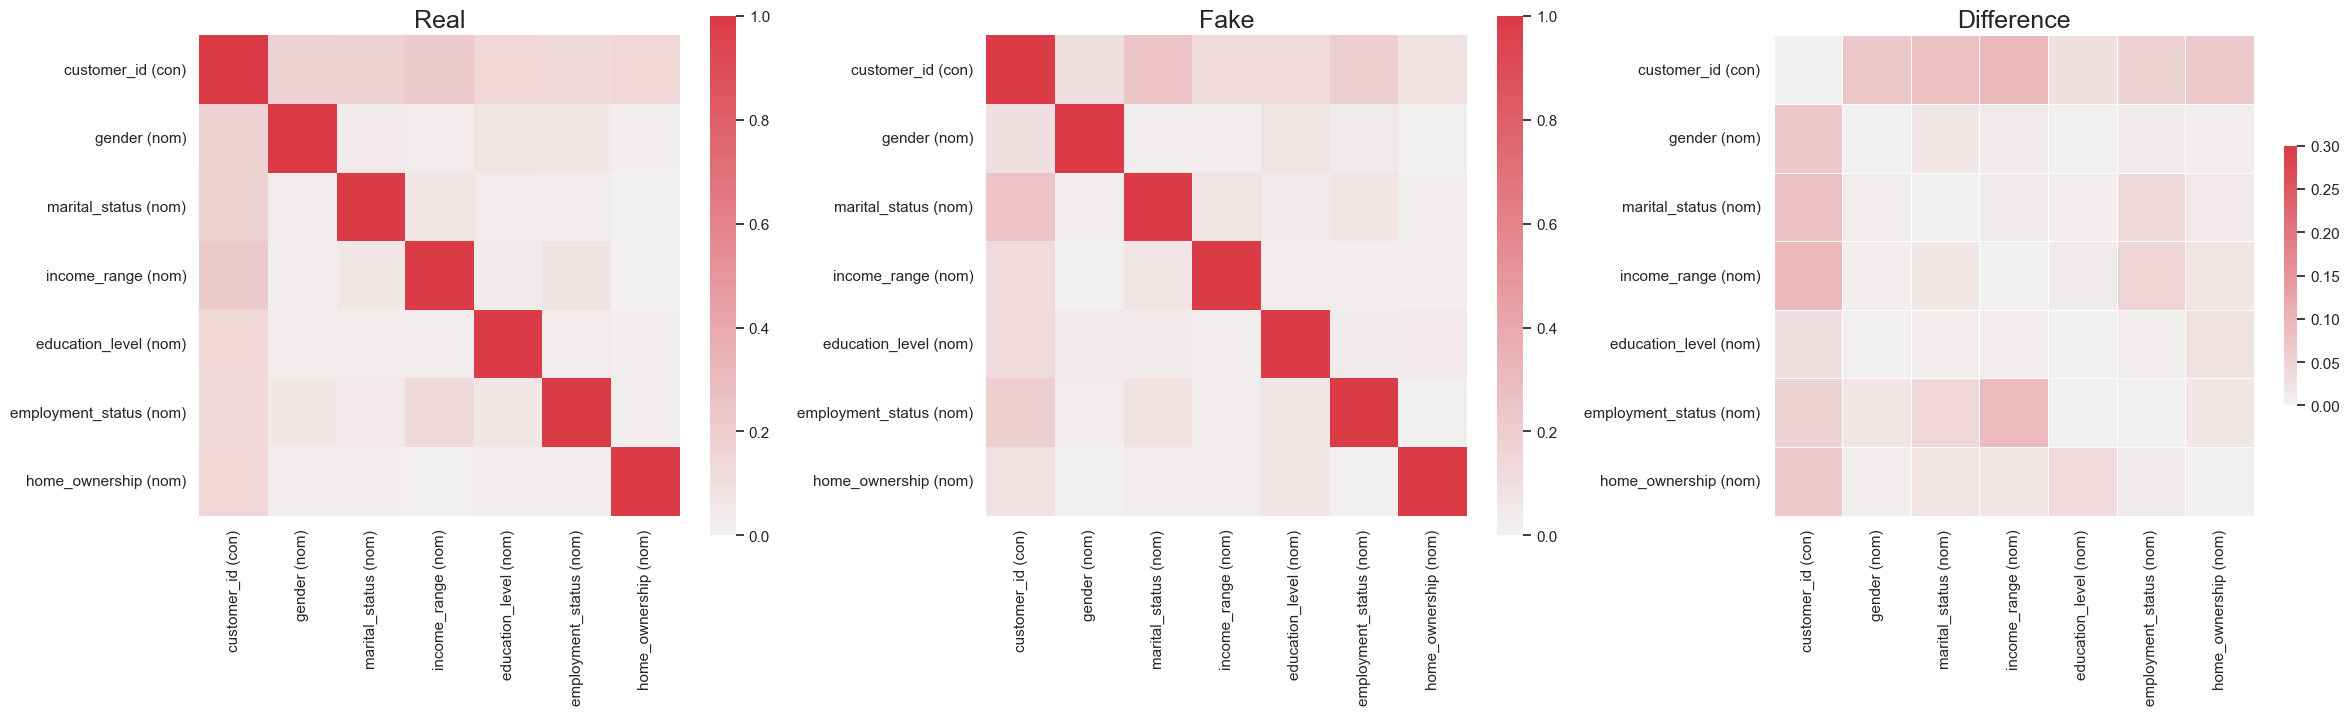

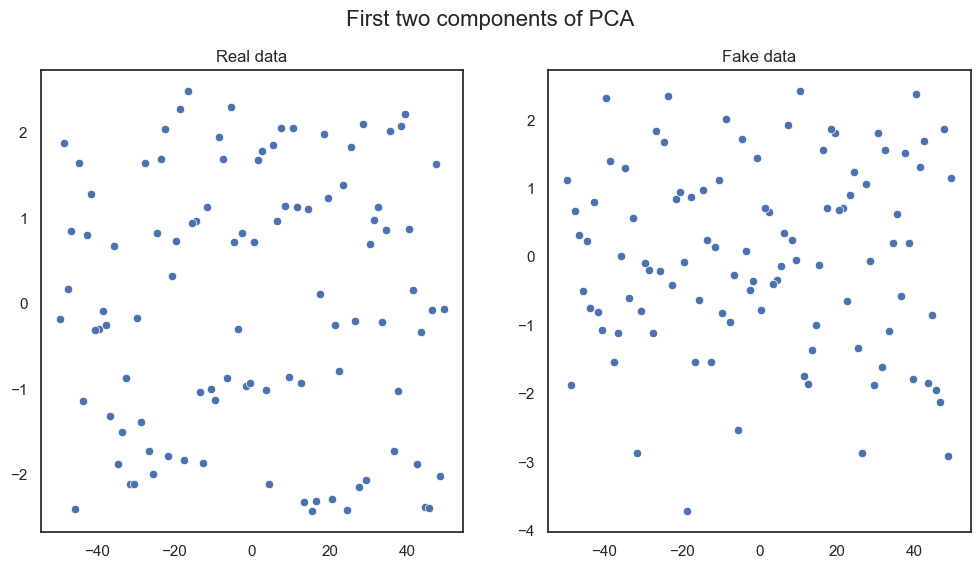

/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


IPython not installed.


/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


IPython not installed.

Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.3500   0.5500              0.3333
DecisionTreeClassifier_real   0.4000   0.3500              0.2500
LogisticRegression_fake       0.6000   0.5500              0.3793
LogisticRegression_real       0.6000   0.4500              0.2500
MLPClassifier_fake            0.5500   0.5000              0.7391
MLPClassifier_real            0.4000   0.4500              0.7391
RandomForestClassifier_fake   0.4500   0.6000              0.3333
RandomForestClassifier_real   0.5500   0.5000              0.5385

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.6553
nearest neighbor std                     0.4396

Miscellaneous results:
                            

In [124]:
evaluate_synthetic_data(df_customer_demographics, 
                        synthetic_data["customer_demographics"], 
                        metadata, 
                        dataset_name="customer_demographics")

# Advance Analytics

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp, chi2_contingency
from scipy.spatial.distance import jensenshannon
from sklearn.neighbors import NearestNeighbors

In [37]:
class EvaluatorDict:
    def __init__(self, real_data, synthetic_data):
        """
        real_data & synthetic_data are dictionaries where:
        - Keys are table names
        - Values are pandas DataFrames
        """
        self.real_data = real_data
        self.synthetic_data = synthetic_data
    
    def detect_column_types(self, df):
        """Detect numerical and categorical columns"""
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def ks_test(self, real_df, synth_df, num_cols):
        """Perform KS test on numerical columns"""
        results = {}
        for col in num_cols:
            stat, p_value = ks_2samp(real_df[col], synth_df[col])
            results[col] = {'KS Statistic': stat, 'P-Value': p_value}
        return results

    def jensen_shannon_divergence(self, real_df, synth_df, cat_cols):
        """Compute JSD for categorical columns"""
        results = {}
        for col in cat_cols:
            real_dist = real_df[col].value_counts(normalize=True).sort_index()
            synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

            # Align distributions
            all_categories = set(real_dist.index).union(set(synth_dist.index))
            real_dist = real_dist.reindex(all_categories, fill_value=0)
            synth_dist = synth_dist.reindex(all_categories, fill_value=0)

            jsd = jensenshannon(real_dist, synth_dist)
            results[col] = {'JSD': jsd}
        return results

    def correlation_comparison(self, real_df, synth_df, num_cols):
        """Compare correlation matrices"""
        real_corr = real_df[num_cols].corr()
        synth_corr = synth_df[num_cols].corr()
        diff = np.abs(real_corr - synth_corr).mean().mean()  # Mean absolute difference
        return {'Correlation Difference': diff}

    def foreign_key_check(self):
        """Ensure foreign key relationships are preserved"""
        results = {}
        for table, df in self.synthetic_data.items():
            if table == "transactions":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results['transactions → customers_info'] = f"{len(missing_customers)} missing references"
            
            if table == "credit_cards":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results['credit_cards → customers_info'] = f"{len(missing_customers)} missing references"

        return results

    def customer_card_ratio(self):
        """Check if customer-card distribution is similar"""
        real_ratio = self.real_data['credit_cards']['customer_id'].value_counts()
        synth_ratio = self.synthetic_data['credit_cards']['customer_id'].value_counts()
        
        real_mean, synth_mean = real_ratio.mean(), synth_ratio.mean()
        diff = abs(real_mean - synth_mean) / real_mean
        return {'Customer-Card Ratio Difference': diff}

    def knn_privacy_check(self, num_cols, k=5):
        """Check privacy leakage using Nearest Neighbors"""
        real_values = np.vstack([self.real_data[table][num_cols].values for table in self.real_data])
        synth_values = np.vstack([self.synthetic_data[table][num_cols].values for table in self.synthetic_data])

        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(real_values)
        distances, _ = knn.kneighbors(synth_values)
        avg_distance = np.mean(distances)
        return {'Nearest Neighbor Distance': avg_distance}

    def evaluate(self):
        """Run all evaluations"""
        results = {}
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results[table] = {
                "KS Test (Numerical)": self.ks_test(real_df, synth_df, num_cols),
                "JSD (Categorical)": self.jensen_shannon_divergence(real_df, synth_df, cat_cols),
                "Correlation Difference": self.correlation_comparison(real_df, synth_df, num_cols)
            }
        
        # Add inter-table checks
        results["Foreign Key Check"] = self.foreign_key_check()
        results["Customer-Card Ratio"] = self.customer_card_ratio()
        results["Privacy Check"] = self.knn_privacy_check(num_cols)

        return results

In [40]:
class Evaluator:
    def __init__(self, real_data, synthetic_data):
        """
        real_data & synthetic_data are dictionaries where:
        - Keys are table names
        - Values are pandas DataFrames
        """
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def detect_column_types(self, df):
        """Detect numerical and categorical columns"""
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def ks_test(self, table_name, real_df, synth_df, num_cols):
        """Perform KS test on numerical columns"""
        results = []
        for col in num_cols:
            stat, p_value = ks_2samp(real_df[col], synth_df[col])
            results.append(["KS Test", table_name, col, "Numerical", stat, p_value])
        return results

    def jensen_shannon_divergence(self, table_name, real_df, synth_df, cat_cols):
        """Compute JSD for categorical columns"""
        results = []
        for col in cat_cols:
            real_dist = real_df[col].value_counts(normalize=True).sort_index()
            synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

            # Align distributions
            all_categories = set(real_dist.index).union(set(synth_dist.index))
            real_dist = real_dist.reindex(all_categories, fill_value=0)
            synth_dist = synth_dist.reindex(all_categories, fill_value=0)

            jsd = jensenshannon(real_dist, synth_dist)
            results.append(["JSD", table_name, col, "Categorical", jsd, None])  # No p-value for JSD
        return results

    def correlation_comparison(self, table_name, real_df, synth_df, num_cols):
        """Compare correlation matrices"""
        real_corr = real_df[num_cols].corr()
        synth_corr = synth_df[num_cols].corr()
        diff = np.abs(real_corr - synth_corr).mean().mean()  # Mean absolute difference
        return [["Correlation Difference", table_name, "All", "Numerical", diff, None]]

    def foreign_key_check(self):
        """Ensure foreign key relationships are preserved"""
        results = []
        for table, df in self.synthetic_data.items():
            if table == "transactions":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results.append(["Foreign Key Check", table, "customer_id", "Categorical", len(missing_customers), None])
            
            if table == "credit_cards":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results.append(["Foreign Key Check", table, "customer_id", "Categorical", len(missing_customers), None])

        return results

    def customer_card_ratio(self):
        """Check if customer-card distribution is similar"""
        real_ratio = self.real_data['credit_cards']['customer_id'].value_counts()
        synth_ratio = self.synthetic_data['credit_cards']['customer_id'].value_counts()
        
        real_mean, synth_mean = real_ratio.mean(), synth_ratio.mean()
        diff = abs(real_mean - synth_mean) / real_mean
        return [["Customer-Card Ratio", "credit_cards", "customer_id", "Categorical", diff, None]]

    def knn_privacy_check(self, num_cols, k=5):
        """Check privacy leakage using Nearest Neighbors"""
        real_values = np.vstack([self.real_data[table][num_cols].values for table in self.real_data])
        synth_values = np.vstack([self.synthetic_data[table][num_cols].values for table in self.synthetic_data])

        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(real_values)
        distances, _ = knn.kneighbors(synth_values)
        avg_distance = np.mean(distances)
        return [["Nearest Neighbor Distance", "All Tables", "All", "Numerical", avg_distance, None]]

    def evaluate(self):
        """Run all evaluations and return as a DataFrame"""
        results = []
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results.extend(self.ks_test(table, real_df, synth_df, num_cols))
            results.extend(self.jensen_shannon_divergence(table, real_df, synth_df, cat_cols))
            results.extend(self.correlation_comparison(table, real_df, synth_df, num_cols))
        
        # Add inter-table checks
        results.extend(self.foreign_key_check())
        results.extend(self.customer_card_ratio())
        results.extend(self.knn_privacy_check(num_cols))

        # Convert to DataFrame
        df_results = pd.DataFrame(results, columns=["Metric", "Table Name", "Column Name", "Column DType", "Value", "P-Value"])
        return df_results


In [36]:
class StatsEvaluator:
    def __init__(self, real_data, synthetic_data):
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def detect_column_types(self, df):
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def categorize_evaluation(self, metric, value, p_value):
        """Categorizes metric results as Good, Average, or Bad"""
        if metric in ["KS Test", "Transaction Amount Per Customer", "Joint Distribution Check"]:
            if value > 0.2:
                return "Bad"
            elif value > 0.1:
                return "Average"
            else:
                return "Good"

        elif metric == "JSD":
            if value > 0.3:
                return "Bad"
            elif value > 0.1:
                return "Average"
            else:
                return "Good"

        elif metric == "Foreign Key Check":
            if value > 0.05:
                return "Bad"
            elif value > 0.01:
                return "Average"
            else:
                return "Good"

        elif metric == "Customer-Card Ratio":
            if value > 0.2:
                return "Bad"
            elif value > 0.1:
                return "Average"
            else:
                return "Good"

        elif metric == "Nearest Neighbor Distance":
            if value > 0.5:
                return "Bad"
            elif value > 0.2:
                return "Average"
            else:
                return "Good"

        return "Unknown"

    def ks_test(self, table_name, real_df, synth_df, num_cols):
        results = []
        for col in num_cols:
            stat, p_value = ks_2samp(real_df[col], synth_df[col])
            evaluation = self.categorize_evaluation("KS Test", stat, p_value)
            results.append(["KS Test", table_name, col, "Numerical", stat, p_value, evaluation])
        return results

    def jensen_shannon_divergence(self, table_name, real_df, synth_df, cat_cols):
        results = []
        for col in cat_cols:
            real_dist = real_df[col].value_counts(normalize=True).sort_index()
            synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

            all_categories = set(real_dist.index).union(set(synth_dist.index))
            real_dist = real_dist.reindex(all_categories, fill_value=0)
            synth_dist = synth_dist.reindex(all_categories, fill_value=0)

            jsd = jensenshannon(real_dist, synth_dist)
            evaluation = self.categorize_evaluation("JSD", jsd, None)
            results.append(["JSD", table_name, col, "Categorical", jsd, None, evaluation])
        return results

    def foreign_key_check(self):
        results = []
        for table, df in self.synthetic_data.items():
            if table == "transactions":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                eval_result = self.categorize_evaluation("Foreign Key Check", len(missing_customers) / len(df), None)
                results.append(["Foreign Key Check", table, "customer_id", "Categorical", len(missing_customers), None, eval_result])

        return results

    def customer_card_ratio(self):
        real_ratio = self.real_data['credit_cards']['customer_id'].value_counts()
        synth_ratio = self.synthetic_data['credit_cards']['customer_id'].value_counts()
        
        real_mean, synth_mean = real_ratio.mean(), synth_ratio.mean()
        diff = abs(real_mean - synth_mean) / real_mean
        eval_result = self.categorize_evaluation("Customer-Card Ratio", diff, None)
        return [["Customer-Card Ratio", "credit_cards", "customer_id", "Categorical", diff, None, eval_result]]

    def transaction_amount_per_customer(self):
        real_trans = self.real_data['transactions'].groupby('customer_id')['amount'].sum()
        synth_trans = self.synthetic_data['transactions'].groupby('customer_id')['amount'].sum()

        stat, p_value = ks_2samp(real_trans, synth_trans)
        eval_result = self.categorize_evaluation("Transaction Amount Per Customer", stat, p_value)
        return [["Transaction Amount Per Customer", "transactions", "customer_id", "Numerical", stat, p_value, eval_result]]

    def joint_distribution_check(self):
        real_jd = self.real_data['transactions'][['customer_id', 'amount']]
        synth_jd = self.synthetic_data['transactions'][['customer_id', 'amount']]

        real_dist = real_jd.groupby('customer_id')['amount'].mean()
        synth_dist = synth_jd.groupby('customer_id')['amount'].mean()

        stat, p_value = ks_2samp(real_dist, synth_dist)
        eval_result = self.categorize_evaluation("Joint Distribution Check", stat, p_value)
        return [["Joint Distribution Check", "transactions", "customer_id-amount", "Numerical", stat, p_value, eval_result]]

    def knn_privacy_check(self, num_cols, k=5):
        real_values = np.vstack([self.real_data[table][num_cols].values for table in self.real_data])
        synth_values = np.vstack([self.synthetic_data[table][num_cols].values for table in self.synthetic_data])

        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(real_values)
        distances, _ = knn.kneighbors(synth_values)
        avg_distance = np.mean(distances)

        eval_result = self.categorize_evaluation("Nearest Neighbor Distance", avg_distance, None)
        return [["Nearest Neighbor Distance", "All Tables", "All", "Numerical", avg_distance, None, eval_result]]

    def evaluate(self):
        results = []
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results.extend(self.ks_test(table, real_df, synth_df, num_cols))
            results.extend(self.jensen_shannon_divergence(table, real_df, synth_df, cat_cols))

        results.extend(self.foreign_key_check())
        results.extend(self.customer_card_ratio())
        results.extend(self.transaction_amount_per_customer())
        results.extend(self.joint_distribution_check())
        results.extend(self.knn_privacy_check(num_cols))

        df_results = pd.DataFrame(results, columns=["Metric", "Table Name", "Column Name", "Column DType", "Value", "P-Value", "Evaluation"])
        return df_results


![Screenshot 2025-02-11 at 9.29.20 AM.png](<attachment:Screenshot 2025-02-11 at 9.29.20 AM.png>)
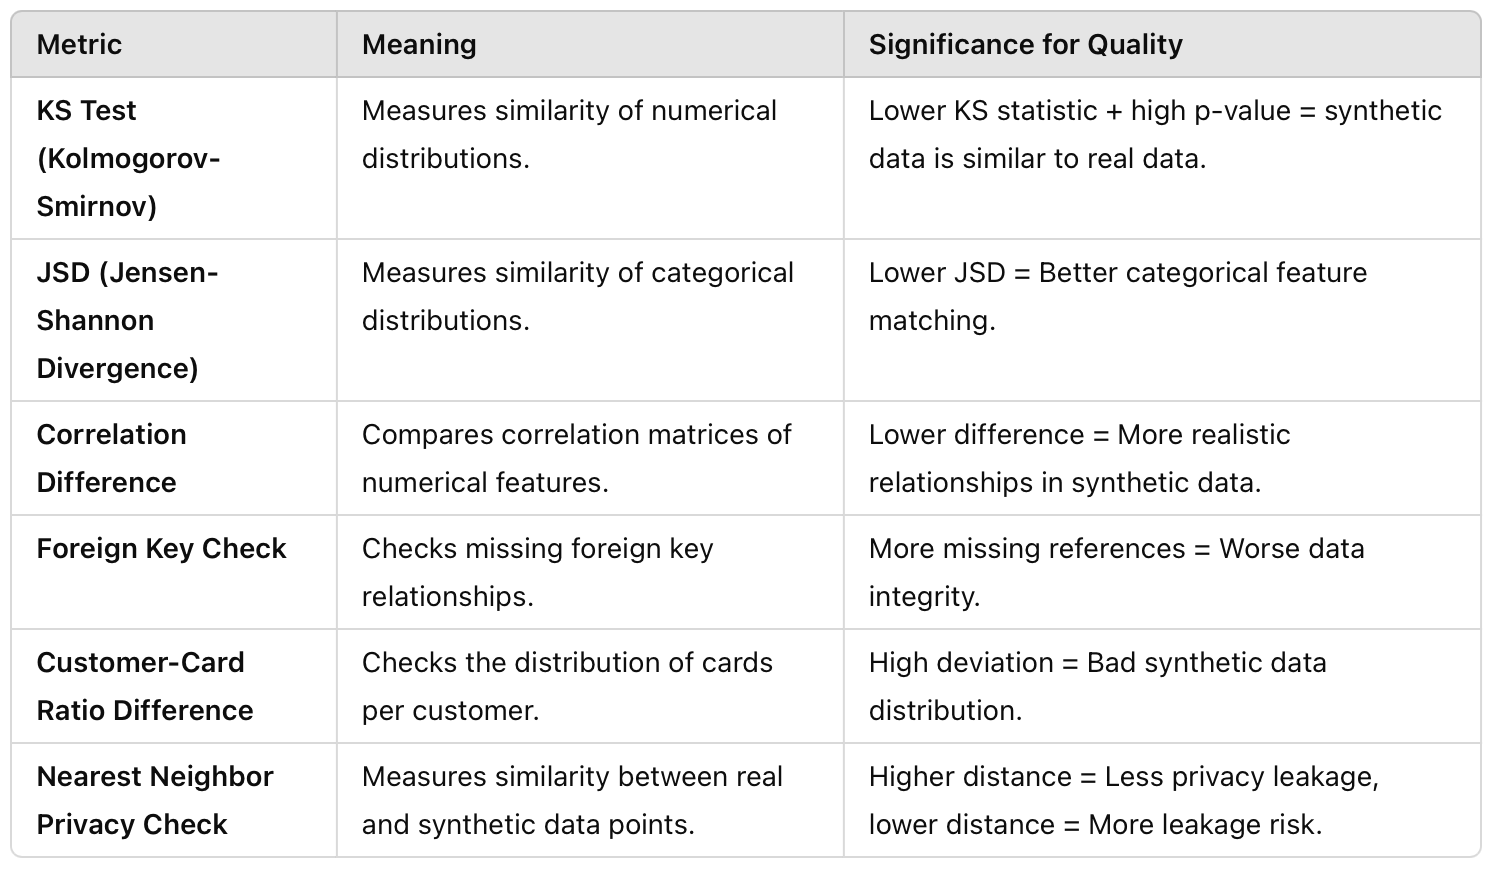

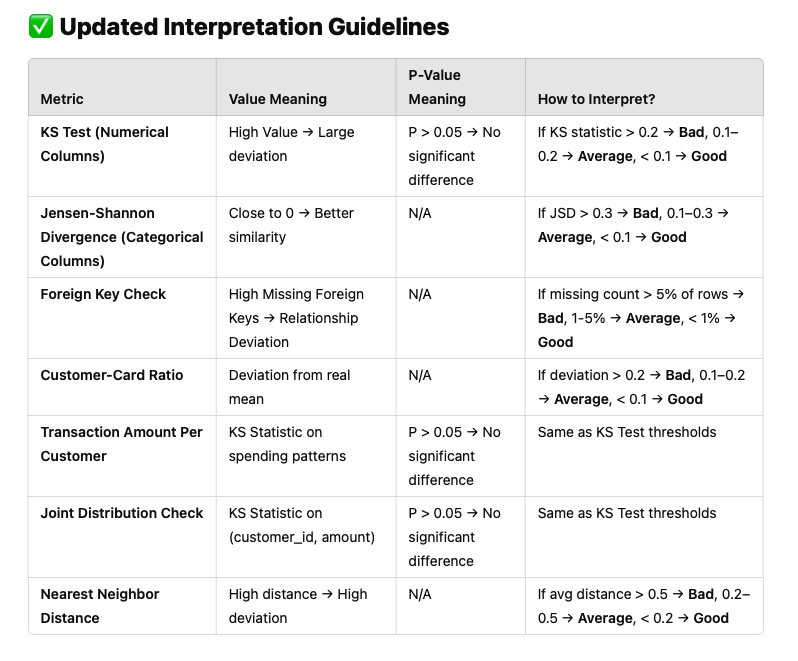

In [37]:
evaluator = StatsEvaluator(tables, synthetic_data)
evaluation_results = evaluator.evaluate()
evaluation_results

,Metric,Table Name,Column Name,Column DType,Value,P-Value,Evaluation
0,KS Test,customers_info,customer_id,Numerical,0.0100,1.0000,Good
1,JSD,customers_info,first_name,Categorical,0.3771,NaN,Bad
2,JSD,customers_info,last_name,Categorical,0.3980,NaN,Bad
3,JSD,customers_info,email,Categorical,0.4142,NaN,Bad
4,JSD,customers_info,phone_number,Categorical,0.4036,NaN,Bad
5,JSD,customers_info,address,Categorical,0.4253,NaN,Bad
6,JSD,customers_info,account_status,Categorical,0.0173,NaN,Good
7,KS Test,transactions,transaction_id,Numerical,0.1758,0.0001,Average
8,KS Test,transactions,customer_id,Numerical,0.0443,0.8839,Good
9,KS Test,transactions,card_id,Numerical,0.0661,0.4445,Good


## Drift Evaluator

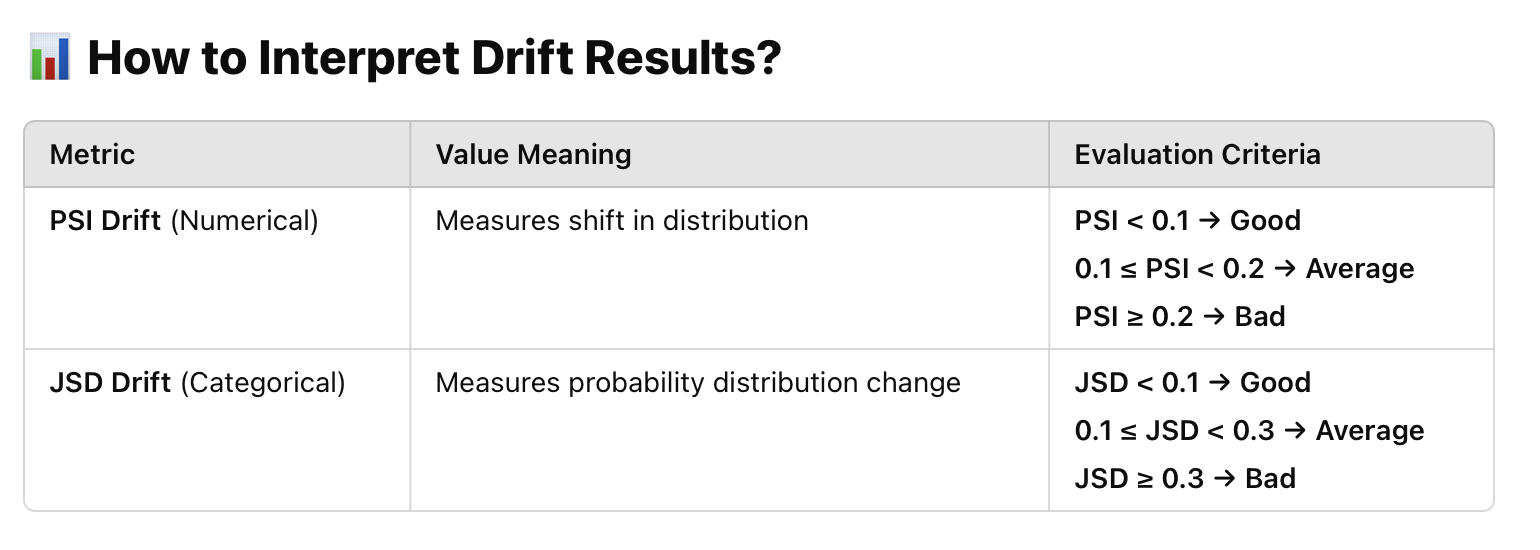

In [38]:
class DriftEvaluator:
    def __init__(self, real_data, synthetic_data):
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def detect_column_types(self, df):
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def population_stability_index(self, table_name, real_df, synth_df, num_cols):
        results = []
        for col in num_cols:
            real_bins = np.histogram(real_df[col], bins=10)[0] / len(real_df)
            synth_bins = np.histogram(synth_df[col], bins=10)[0] / len(synth_df)
            
            psi_values = np.where(real_bins > 0, (real_bins - synth_bins) * np.log(real_bins / synth_bins), 0)
            psi = np.sum(psi_values)

            evaluation = "Good" if psi < 0.1 else "Average" if psi < 0.2 else "Bad"
            results.append(["PSI Drift", table_name, col, "Numerical", psi, None, evaluation])
        return results

    def drift_detection(self):
        results = []
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results.extend(self.population_stability_index(table, real_df, synth_df, num_cols))

            for col in cat_cols:
                real_dist = real_df[col].value_counts(normalize=True).sort_index()
                synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

                all_categories = set(real_dist.index).union(set(synth_dist.index))
                real_dist = real_dist.reindex(all_categories, fill_value=0)
                synth_dist = synth_dist.reindex(all_categories, fill_value=0)

                jsd = jensenshannon(real_dist, synth_dist)
                evaluation = "Good" if jsd < 0.1 else "Average" if jsd < 0.3 else "Bad"
                results.append(["JSD Drift", table, col, "Categorical", jsd, None, evaluation])

        return results

    def evaluate(self):
        results = []
        results.extend(self.drift_detection())

        df_results = pd.DataFrame(results, columns=["Metric", "Table Name", "Column Name", "Column DType", "Value", "P-Value", "Evaluation"])
        return df_results


In [39]:
evaluator = DriftEvaluator(tables, synthetic_data)
evaluation_results = evaluator.evaluate()
evaluation_results

/var/folders/n4/nw0mfq3s59zc2v6llpk2xmvw0000gn/T/ipykernel_37076/4224457360.py:17: RuntimeWarning: invalid value encountered in divide
  psi_values = np.where(real_bins > 0, (real_bins - synth_bins) * np.log(real_bins / synth_bins), 0)
/var/folders/n4/nw0mfq3s59zc2v6llpk2xmvw0000gn/T/ipykernel_37076/4224457360.py:17: RuntimeWarning: divide by zero encountered in log
  psi_values = np.where(real_bins > 0, (real_bins - synth_bins) * np.log(real_bins / synth_bins), 0)


,Metric,Table Name,Column Name,Column DType,Value,P-Value,Evaluation
0,PSI Drift,customers_info,customer_id,Numerical,0.0000,None,Good
1,JSD Drift,customers_info,first_name,Categorical,0.3771,None,Bad
2,JSD Drift,customers_info,last_name,Categorical,0.3980,None,Bad
3,JSD Drift,customers_info,email,Categorical,0.4142,None,Bad
4,JSD Drift,customers_info,phone_number,Categorical,0.4036,None,Bad
5,JSD Drift,customers_info,address,Categorical,0.4253,None,Bad
6,JSD Drift,customers_info,account_status,Categorical,0.0173,None,Good
7,PSI Drift,transactions,transaction_id,Numerical,0.0002,None,Good
8,PSI Drift,transactions,customer_id,Numerical,0.0306,None,Good
9,PSI Drift,transactions,card_id,Numerical,0.0340,None,Good


## Drift analysis

In [ ]:
import pandas as pd
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, DataQualityPreset

class EvidentlyEvaluator:
    def __init__(self, real_data, synthetic_data):
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def evaluate_table(self, table_name):
        real_df, synth_df = self.real_data[table_name], self.synthetic_data[table_name]

        drift_report = Report(metrics=[DataDriftPreset()])
        drift_report.run(reference_data=real_df, current_data=synth_df)

        quality_report = Report(metrics=[DataQualityPreset()])
        quality_report.run(reference_data=real_df, current_data=synth_df)

        return drift_report, quality_report

    def evaluate_all(self):
        results = {}
        for table in self.real_data.keys():
            drift_report, quality_report = self.evaluate_table(table)
            results[table] = {"Drift Report": drift_report, "Quality Report": quality_report}
        return results